
![example](images/43222211_s.jpg)

Copyright: <a href='https://www.123rf.com/profile_jagcz'>Jakub Gojda</a>

# How does a company squeeze into "making movie business" and gets successful

**Authors:** Elena Kazakova
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages to be used in the process
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import shutil
import os
import sqlite3
from sqlite3 import Error
import csv
import io


%matplotlib inline

In [ ]:
def insert_nulls(table_name):
    q1 = 'SELECT * FROM '+ table_name+''
    df = pd.DataFrame(cur.execute(q1))
    df.columns = [x[0] for x in cur.description]
    column_names=list(df.columns)

#dictReader reads empty values as '', they need to be replaced with Nulls in all fields similar to the statement below
    for i in column_names:
        q2='UPDATE '+table_name+' SET '+i+' =NULL WHERE '+i+'=""'
        cur.execute(q2)
    return

In [ ]:
def display_tableDF(table_name):
    q1 = 'SELECT * FROM '+ table_name+''
    df = pd.DataFrame(cur.execute(q1))
    df.columns = [x[0] for x in cur.description]
    return df

In [ ]:
def display_csvfileDF(file_name):
    df = pd.read_csv('data/unzippedData/'+file_name, header=0, encoding='UTF-8')
    return df

In [ ]:
def display_tsvfileDF(file_name):
    df = pd.read_csv('data/unzippedData/'+file_name, sep = '\t', header=0, encoding='latin1')
    return df

In [2]:
# Trying out unzipping a single file and see content

# First step at bash --git checkpout template-mvp ()
# Open template notebook
# Save as your own notebook with a different name
# Now back to unzippin: the first step is to create a separate directory for unzipped csv files through bash terminal
# the address is  ~/Documents/Flatiron/Phase1/Project/dsc-project-template/data/unzippedData
# Unzipping the gz file
with gzip.open('data/zippedData/bom.movie_gross.csv.gz') as f:
            bom_movie_gross = pd.read_csv(f)
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Let's save it as an csv file to a directory where unzipped files will live
with gzip.open('data/zippedData/bom.movie_gross.csv.gz', 'rb') as f_out:
    with open('data/unzippedData/bom.movie_gross.csv', 'wb') as f_in:
        shutil.copyfileobj(f_out, f_in)

In [9]:
# Creating a list of file names to loop throught unzipping; 
# unzipping the files in the list of gz files 
file_list_to_unzip_raw = ['bom.movie_gross.csv.gz', 'imdb.name.basics.csv.gz', 'imdb.title.akas.csv.gz', 
                          'imdb.title.basics.csv.gz', 'imdb.title.crew.csv.gz', 'imdb.title.principals.csv.gz',
                          'imdb.title.ratings.csv.gz', 'rt.movie_info.tsv.gz', 'rt.reviews.tsv.gz',
                          'tmdb.movies.csv.gz', 'tn.movie_budgets.csv.gz']
addition_path_from = 'data/zippedData/'
addition_path_to = 'data/unzippedData/'
for file in file_list_to_unzip_raw:
    with gzip.open(addition_path_from + file, 'rb') as f_out:
        with open(addition_path_to + file[0:-3], 'wb') as f_in:
            shutil.copyfileobj(f_out, f_in)

In [32]:
#Testing conversion of an unzipped tsv file into a DataFrame and printing out count and info along with a head of a DF
rt_movie_info = pd.read_csv('data/unzippedData/rt.reviews.tsv', sep = '\t', header=0, encoding='latin1')
print(rt_movie_info.count())
print(rt_movie_info.info())
rt_movie_info.head()

id            54432
review        48869
rating        40915
fresh         54432
critic        51710
top_critic    54432
publisher     54123
date          54432
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [169]:
#listing the files in the unzipped directory to make a list with path defined out of these files
list_unzipped_files = os.listdir('data/unzippedData')
list_unzipped_files

['bom.movie_gross.csv',
 'imdb.name.basics.csv',
 'imdb.title.akas.csv',
 'imdb.title.basics.csv',
 'imdb.title.crew.csv',
 'imdb.title.principals.csv',
 'imdb.title.ratings.csv',
 'rt.movie_info.tsv',
 'rt.reviews.tsv',
 'tmdb.movies.csv',
 'tn.movie_budgets.csv']

In [55]:
!ls -l

total 80
-rw-r--r-- 1 elena 197121 35637 Mar 13 22:49 DS_Project_Presentation.pdf
-rw-r--r-- 1 elena 197121  4459 Mar 13 22:49 README.md
-rw-r--r-- 1 elena 197121  2831 Mar 13 22:49 TEMPLATE_README.md
drwxr-xr-x 1 elena 197121     0 Mar 14 15:17 data
-rw-r--r-- 1 elena 197121  5365 Mar 13 23:01 dsc-phase1-project-template.ipynb
-rw-r--r-- 1 elena 197121 23754 Mar 14 16:09 dsc_phase1_project_EVK.ipynb
drwxr-xr-x 1 elena 197121     0 Mar 13 22:49 images


In [2]:
#Creating an sqlite3 movies database
conn = sqlite3.connect('data/sqlite/db/movies.db')
cur = conn.cursor() 

In [182]:
imdb_name_basics = pd.read_csv('data/unzippedData/imdb.name.basics.csv', header=0, encoding='UTF-8')
print(imdb_name_basics.count())
print(imdb_name_basics.info())
imdb_name_basics.head()

nconst                606648
primary_name          606648
birth_year             82736
death_year              6783
primary_profession    555308
known_for_titles      576444
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
None


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [187]:
#Note that an sql folder must be created first, I did it in bash terminal because !cd command was not working
#The full path is ~/Documents/Flatiron/Phase1/Project/dsc-project-template/data/sqlite/db

#Adding table and data to the new database ('replace' option to overwrite existing table for future use).
#I am opting out to creating tables manually due to the fact that the datatypes of the columns are unknown 
#upfront and cannot be easily extracted from the csv file.info(). Besides this approach will allow me to name the columns 
#with more descriptive names

cur.execute("""CREATE TABLE imdb_name_basics
            ([generated_id] INTEGER PRIMARY KEY, [Nconstant] text, [Full_Name] text, [Birth_Year] integer, 
             [Death_Year] interger, [primary_profession] text, [known_for_titles] text)""")

In [3]:
cur.execute("""SELECT * FROM imdb_name_basics""").fetchall()

[(1,
  'nm0061671',
  'Mary Ellen Bauder',
  None,
  None,
  'miscellaneous,production_manager,producer',
  'tt0837562,tt2398241,tt0844471,tt0118553'),
 (2,
  'nm0061865',
  'Joseph Bauer',
  None,
  None,
  'composer,music_department,sound_department',
  'tt0896534,tt6791238,tt0287072,tt1682940'),
 (3,
  'nm0062070',
  'Bruce Baum',
  None,
  None,
  'miscellaneous,actor,writer',
  'tt1470654,tt0363631,tt0104030,tt0102898'),
 (4,
  'nm0062195',
  'Axel Baumann',
  None,
  None,
  'camera_department,cinematographer,art_department',
  'tt0114371,tt2004304,tt1618448,tt1224387'),
 (5,
  'nm0062798',
  'Pete Baxter',
  None,
  None,
  'production_designer,art_department,set_decorator',
  'tt0452644,tt0452692,tt3458030,tt2178256'),
 (6,
  'nm0062879',
  'Ruel S. Bayani',
  None,
  None,
  'director,production_manager,miscellaneous',
  'tt2590280,tt0352080,tt0216559,tt2057445'),
 (7, 'nm0063198', 'Bayou', None, None, 'actor', 'tt6579724,tt0093116'),
 (8,
  'nm0063432',
  'Stevie Be-Zet',
  N

In [7]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table'""").fetchall()

[('imdb_title_akas',),
 ('imdb_name_basics',),
 ('bom_movie_gross',),
 ('imdb_title_basics',),
 ('imdb_title_crew',),
 ('imdb_title_principals',),
 ('imdb_title_ratings',),
 ('tmdb_movies',),
 ('tn_movie_budgets',),
 ('rt_reviews',),
 ('rt_movie_info',)]

In [189]:
#Inserting data into the tables
with open('data/unzippedData/imdb.name.basics.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['nconst'], i['primary_name'], (i['birth_year']), (i['death_year']),
              i['primary_profession'], i['known_for_titles']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO imdb_name_basics ('Nconstant', 'Full_Name', 'Birth_Year', 'Death_Year',
                   'primary_profession', 'known_for_titles')
                    VALUES (?, ?, ?, ?, ?, ?);""", insert_into_db)

In [195]:
conn.commit()

In [4]:
def insert_nulls(table_name):
    q1 = 'SELECT * FROM '+ table_name+''
    df = pd.DataFrame(cur.execute(q1))
    df.columns = [x[0] for x in cur.description]
    column_names=list(df.columns)

#dictReader reads empty values as '', they need to be replaced with Nulls in all fields similar to the statement below
    for i in column_names:
        q2='UPDATE '+table_name+' SET '+i+' =NULL WHERE '+i+'=""'
        cur.execute(q2)
    return

In [191]:
insert_nulls('imdb_name_basics')

In [192]:
q = 'SELECT * FROM imdb_name_basics'
df = pd.DataFrame(cur.execute(q))
df.columns = [x[0] for x in cur.description]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   generated_id        606648 non-null  int64  
 1   Nconstant           606648 non-null  object 
 2   Full_Name           606648 non-null  object 
 3   Birth_Year          82736 non-null   float64
 4   Death_Year          6783 non-null    float64
 5   primary_profession  555308 non-null  object 
 6   known_for_titles    576444 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 32.4+ MB


In [181]:
bom_movie_gross = pd.read_csv('data/unzippedData/bom.movie_gross.csv', header=0, encoding='UTF-8')
print(bom_movie_gross.count())
print(bom_movie_gross.info())
bom_movie_gross.head()

title             3387
studio            3382
domestic_gross    3359
foreign_gross     2037
year              3387
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [197]:
cur.execute("""CREATE TABLE bom_movie_gross
            ([generated_id] INTEGER PRIMARY KEY, [title] text, [studio] text, [domestic_gross] real, 
             [foreign_gross] real, [year] interger)""")

In [198]:
with open('data/unzippedData/bom.movie_gross.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['title'], i['studio'], (i['domestic_gross']), (i['foreign_gross']),
              i['year']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO bom_movie_gross ('title', 'studio', 'domestic_gross', 'foreign_gross',
                   'year')
                    VALUES (?, ?, ?, ?, ?);""", insert_into_db)

In [202]:
insert_nulls('bom_movie_gross')

In [564]:
imdb_title_akas = pd.read_csv('data/unzippedData/imdb.title.akas.csv', header=0, encoding='UTF-8')
print(imdb_title_akas.count())
print(imdb_title_akas.info())
imdb_title_akas.head()

title_id             331703
ordering             331703
title                331703
region               278410
language              41715
types                168447
attributes            14925
is_original_title    331678
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [565]:
imdb_title_akas.to_sql('imdb_title_akas_from_file_directly', conn, if_exists='replace', index = False)

In [173]:
cur.execute("""CREATE TABLE imdb_title_akas
            ([generated_id] INTEGER PRIMARY KEY, [title_id] text, [ordering] interger, [title] text, 
             [region] text, [language] text, [types] text, [attributes] text, [is_original_title] real)""")

In [570]:
display_tableDF_info('imdb_title_akas_from_file_directly')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [176]:
with open('data/unzippedData/imdb.title.akas.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['title_id'], i['ordering'], i['title'], i['region'],
              i['language'], i['types'], i['attributes'], i['is_original_title']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO imdb_title_akas ('title_id', 'ordering', 'title', 'region',
                   'language', 'types', 'attributes', 'is_original_title')
                    VALUES (?, ?, ?, ?, ?, ?, ?, ?);""", insert_into_db)

In [204]:
insert_nulls('imdb_title_akas')

In [5]:
def display_tableDF_info(table_name):
    q1 = 'SELECT * FROM '+ table_name+''
    df = pd.DataFrame(cur.execute(q1))
    df.columns = [x[0] for x in cur.description]
    return df.info()

In [6]:
def display_tableDF(table_name):
    q1 = 'SELECT * FROM '+ table_name+''
    df = pd.DataFrame(cur.execute(q1))
    df.columns = [x[0] for x in cur.description]
    return df

In [7]:
def display_fileDF_info(file_name):
    df = pd.read_csv('data/unzippedData/'+file_name, header=0, encoding='UTF-8')
    return df.info()

In [8]:
def display_fileDF(file_name):
    df = pd.read_csv('data/unzippedData/'+file_name, header=0, encoding='UTF-8')
    return df

In [20]:
def table_query(q):
    df = pd.DataFrame(cur.execute(q))
    df.columns = [x[0] for x in cur.description]
    return df

In [218]:
display_fileDF_info('imdb.title.akas.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [219]:
display_fileDF('imdb.title.akas.csv')

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [208]:
display_tableDF_info('imdb_title_akas')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   generated_id       331703 non-null  int64  
 1   title_id           331703 non-null  object 
 2   ordering           331703 non-null  int64  
 3   title              331703 non-null  object 
 4   region             278417 non-null  object 
 5   language           41715 non-null   object 
 6   types              168447 non-null  object 
 7   attributes         14925 non-null   object 
 8   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 22.8+ MB


In [221]:
display_tableDF('imdb_title_akas')

,generated_id,title_id,ordering,title,region,language,types,attributes,is_original_title
0,1,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,2,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,3,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,4,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,5,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...,...
331698,331699,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,331700,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,331701,tt9880178,1,La atención,None,None,original,None,1.0
331701,331702,tt9880178,2,La atención,ES,None,None,None,0.0


In [223]:
display_fileDF_info('imdb.title.basics.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [224]:
display_fileDF('imdb.title.basics.csv')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [226]:
cur.execute("""CREATE TABLE imdb_title_basics
            ([generated_id] INTEGER PRIMARY KEY, [tconst] text, [primary_title] interger, [original_title] text, 
             [start_year] integer, [runtime_minutes] real, [genres] text)""")

In [228]:
with open('data/unzippedData/imdb.title.basics.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['tconst'], i['primary_title'], i['original_title'], i['start_year'],
              i['runtime_minutes'], i['genres']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO imdb_title_basics ('tconst', 'primary_title', 'original_title', 'start_year',
              'runtime_minutes', 'genres')
                    VALUES (?, ?, ?, ?, ?, ?);""", insert_into_db)

In [230]:
insert_nulls('imdb_title_basics')

In [231]:
display_tableDF_info('imdb_title_basics')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   generated_id     146144 non-null  int64  
 1   tconst           146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146123 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  114405 non-null  float64
 6   genres           140736 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.8+ MB


In [232]:
display_tableDF('imdb_title_basics')

,generated_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,2,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,3,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,4,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,5,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146140,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146141,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146142,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146143,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [234]:
display_fileDF_info('imdb.title.crew.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [235]:
display_fileDF('imdb.title.crew.csv')

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [236]:
cur.execute("""CREATE TABLE imdb_title_crew
            ([generated_id] INTEGER PRIMARY KEY, [tconst] text, [directors] text, [writers] text)""")

In [238]:
with open('data/unzippedData/imdb.title.crew.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['tconst'], i['directors'], i['writers']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO imdb_title_crew ('tconst', 'directors', 'writers')
                    VALUES (?, ?, ?);""", insert_into_db)

In [240]:
insert_nulls('imdb_title_crew')

In [241]:
display_tableDF_info('imdb_title_crew')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   generated_id  146144 non-null  int64 
 1   tconst        146144 non-null  object
 2   directors     140417 non-null  object
 3   writers       110261 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [242]:
display_tableDF('imdb_title_crew')

,generated_id,tconst,directors,writers
0,1,tt0285252,nm0899854,nm0899854
1,2,tt0438973,None,"nm0175726,nm1802864"
2,3,tt0462036,nm1940585,nm1940585
3,4,tt0835418,nm0151540,"nm0310087,nm0841532"
4,5,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...,...
146139,146140,tt8999974,nm10122357,nm10122357
146140,146141,tt9001390,nm6711477,nm6711477
146141,146142,tt9001494,"nm10123242,nm10123248",None
146142,146143,tt9004986,nm4993825,nm4993825


In [243]:
display_fileDF_info('imdb.title.principals.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [244]:
display_fileDF('imdb.title.principals.csv')

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [246]:
cur.execute("""CREATE TABLE imdb_title_principals
            ([generated_id] INTEGER PRIMARY KEY, [tconst] text, [ordering] integer, [nconst] text, [category] text,
            [job] text, [characters] text)""")

In [249]:
with open('data/unzippedData/imdb.title.principals.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['tconst'], i['ordering'], i['nconst'], i['category'],
              i['job'], i['characters']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO imdb_title_principals ('tconst', 'ordering', 'nconst', 'category',
              'job', 'characters')
                    VALUES (?, ?, ?, ?, ?, ?);""", insert_into_db)

In [250]:
display_tableDF_info('imdb_title_principals')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   generated_id  1028186 non-null  int64 
 1   tconst        1028186 non-null  object
 2   ordering      1028186 non-null  int64 
 3   nconst        1028186 non-null  object
 4   category      1028186 non-null  object
 5   job           1028186 non-null  object
 6   characters    1028186 non-null  object
dtypes: int64(2), object(5)
memory usage: 54.9+ MB


In [251]:
insert_nulls('imdb_title_principals')

In [252]:
display_tableDF_info('imdb_title_principals')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   generated_id  1028186 non-null  int64 
 1   tconst        1028186 non-null  object
 2   ordering      1028186 non-null  int64 
 3   nconst        1028186 non-null  object
 4   category      1028186 non-null  object
 5   job           177684 non-null   object
 6   characters    393360 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.9+ MB


In [253]:
display_fileDF('imdb.title.ratings.csv')

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [254]:
display_fileDF_info('imdb.title.ratings.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [255]:
cur.execute("""CREATE TABLE imdb_title_ratings
            ([generated_id] INTEGER PRIMARY KEY, [tconst] text, [averagerating] real, [numvotes] integer)""")

In [256]:
with open('data/unzippedData/imdb.title.ratings.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['tconst'], i['averagerating'], i['numvotes']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO imdb_title_ratings ('tconst', 'averagerating', 'numvotes')
                    VALUES (?, ?, ?);""", insert_into_db)

In [257]:
display_tableDF_info('imdb_title_ratings')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   generated_id   73856 non-null  int64  
 1   tconst         73856 non-null  object 
 2   averagerating  73856 non-null  float64
 3   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [258]:
display_tableDF('imdb_title_ratings')

,generated_id,tconst,averagerating,numvotes
0,1,tt10356526,8.3,31
1,2,tt10384606,8.9,559
2,3,tt1042974,6.4,20
3,4,tt1043726,4.2,50352
4,5,tt1060240,6.5,21
...,...,...,...,...
73851,73852,tt9805820,8.1,25
73852,73853,tt9844256,7.5,24
73853,73854,tt9851050,4.7,14
73854,73855,tt9886934,7.0,5


In [303]:
list_unzipped_files = os.listdir('data/unzippedData')
list_unzipped_files

['bom.movie_gross.csv',
 'imdb.name.basics.csv',
 'imdb.title.akas.csv',
 'imdb.title.basics.csv',
 'imdb.title.crew.csv',
 'imdb.title.principals.csv',
 'imdb.title.ratings.csv',
 'rt.movie_info.tsv',
 'rt.reviews.tsv',
 'tmdb.movies.csv',
 'tn.movie_budgets.csv']

In [319]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table'""").fetchall()

[('imdb_title_akas',),
 ('imdb_name_basics',),
 ('bom_movie_gross',),
 ('imdb_title_basics',),
 ('imdb_title_crew',),
 ('imdb_title_principals',),
 ('imdb_title_ratings',),
 ('tmdb_movies',),
 ('tn_movie_budgets',),
 ('rt_reviews',),
 ('rt_movie_info',)]

In [261]:
display_fileDF_info('tmdb.movies.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [268]:
display_fileDF('tmdb.movies.csv')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [263]:
cur.execute("""CREATE TABLE tmdb_movies
            ([generated_id] INTEGER PRIMARY KEY, [genre_ids] text, [id] integer, [original_language] text,
            [original_title] text, [popularity] real, [release_date] text, [title] text,
            [vote_average] real, [vote_count] integer)""")

In [265]:
with open('data/unzippedData/tmdb.movies.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['genre_ids'], i['id'], i['original_language'], i['original_title'], i['popularity'],
                        i['release_date'], i['title'], i['vote_average'], i['vote_count']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO tmdb_movies ('genre_ids', 'id', 'original_language', 'original_title', 'popularity',
                                            'release_date', 'title', 'vote_average', 'vote_count')
                    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?);""", insert_into_db)

In [266]:
display_tableDF_info('tmdb_movies')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   generated_id       26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [267]:
display_tableDF('tmdb_movies')

,generated_id,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,1,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,2,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,3,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,4,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,5,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26513,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26514,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26515,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26516,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [269]:
display_fileDF_info('tn.movie_budgets.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [270]:
display_fileDF('tn.movie_budgets.csv')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [271]:
cur.execute("""CREATE TABLE tn_movie_budgets
            ([generated_id] INTEGER PRIMARY KEY, [id] integer, [release_date] text,
            [movie] text, [production_budget] text, [domestic_gross] text, [worldwide_gross] text)""")

In [273]:
with open('data/unzippedData/tn.movie_budgets.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['id'], i['release_date'], i['movie'], i['production_budget'],
                        i['domestic_gross'], i['worldwide_gross']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO tn_movie_budgets ('id', 'release_date', 'movie', 'production_budget',
                                            'domestic_gross', 'worldwide_gross')
                    VALUES (?, ?, ?, ?, ?, ?);""", insert_into_db)

In [274]:
display_tableDF_info('tn_movie_budgets')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   generated_id       5782 non-null   int64 
 1   id                 5782 non-null   int64 
 2   release_date       5782 non-null   object
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   object
 5   domestic_gross     5782 non-null   object
 6   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


In [275]:
display_tableDF('tn_movie_budgets')

,generated_id,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...,...
5777,5778,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,5779,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,5780,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,5781,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [279]:
rt_reviews_ = pd.read_csv('data/unzippedData/rt.reviews.tsv', sep = '\t', header=0, encoding='latin1')
rt_reviews_.info()
rt_reviews_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [293]:
cur.execute("""CREATE TABLE rt_reviews
            ([generated_id] INTEGER PRIMARY KEY, [id] integer, [review] text,
            [rating] text, [fresh] text, [critic] text, [top_critic] integer, [publisher] text, [date] text)""")

In [297]:
conn.commit()

In [292]:
cur.execute("""DROP table rt_reviews;""")

In [296]:
with open('data/unzippedData/rt.reviews.tsv','r', encoding='latin1') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter ='\t')

    insert_into_db = [(i['id'], i['review'], i['rating'], i['fresh'],
                        i['critic'], i['top_critic'], i['publisher'], i['date']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO rt_reviews ('id', 'review', 'rating', 'fresh','critic', 'top_critic', 'publisher',
 'date') VALUES (?, ?, ?, ?, ?, ?, ?, ?);""", insert_into_db)

In [309]:
insert_nulls('rt_reviews')

In [310]:
display_tableDF_info('rt_reviews')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   generated_id  54432 non-null  int64 
 1   id            54432 non-null  int64 
 2   review        48869 non-null  object
 3   rating        40915 non-null  object
 4   fresh         54432 non-null  object
 5   critic        51710 non-null  object
 6   top_critic    54432 non-null  int64 
 7   publisher     54123 non-null  object
 8   date          54432 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.7+ MB


In [311]:
display_tableDF('rt_reviews')

,generated_id,id,review,rating,fresh,critic,top_critic,publisher,date
0,1,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,2,3,It's an allegory in search of a meaning that n...,None,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,3,... life lived in a bubble in financial dealin...,None,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,4,3,Continuing along a line introduced in last yea...,None,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,5,3,... a perverse twist on neorealism...,None,fresh,None,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...,...
54427,54428,2000,The real charm of this trifle is the deadpan c...,None,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,54429,2000,None,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,54430,2000,None,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,54431,2000,None,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [308]:
rt_movie_info_ = pd.read_csv('data/unzippedData/rt.movie_info.tsv', sep = '\t', header=0, encoding='latin1')
rt_movie_info_.info()
rt_movie_info_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [312]:
cur.execute("""CREATE TABLE rt_movie_info
            ([generated_id] INTEGER PRIMARY KEY, [id] integer, [synopsis] text,
            [rating] text, [genre] text, [director] text, [writer] text, [theater_date] text, [dvd_date] text,
            [currency] text, [box_office] text, [runtime] text, [studio] text)""")

In [313]:
with open('data/unzippedData/rt.movie_info.tsv','r', encoding='latin1') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter ='\t')

    insert_into_db = [(i['id'], i['synopsis'], i['rating'], i['genre'],
                        i['director'], i['writer'], i['theater_date'], i['dvd_date'], i['currency'], i['box_office'],
                      i['runtime'], i['studio']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO rt_movie_info ('id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
 'dvd_date', 'currency', 'box_office', 'runtime', 'studio') VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);""", insert_into_db)

In [315]:
insert_nulls('rt_movie_info')

In [316]:
display_tableDF_info('rt_movie_info')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   generated_id  1560 non-null   int64 
 1   id            1560 non-null   int64 
 2   synopsis      1498 non-null   object
 3   rating        1557 non-null   object
 4   genre         1552 non-null   object
 5   director      1361 non-null   object
 6   writer        1111 non-null   object
 7   theater_date  1201 non-null   object
 8   dvd_date      1201 non-null   object
 9   currency      340 non-null    object
 10  box_office    340 non-null    object
 11  runtime       1530 non-null   object
 12  studio        494 non-null    object
dtypes: int64(2), object(11)
memory usage: 158.6+ KB


In [317]:
display_tableDF('rt_movie_info')

,generated_id,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",None,None,104 minutes,None
1,2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",None,None,116 minutes,None
3,4,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",None,None,128 minutes,None
4,5,7,None,NR,Drama|Romance,Rodney Bennett,Giles Cooper,None,None,None,None,200 minutes,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1556,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,None,None,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1557,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",None,None,88 minutes,Paramount Vantage
1557,1558,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,None,"Jan 1, 1962","May 11, 2004",None,None,111 minutes,None
1558,1559,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",None,None,101 minutes,None


In [4]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table'""").fetchall()

[('imdb_title_akas',),
 ('imdb_name_basics',),
 ('bom_movie_gross',),
 ('imdb_title_basics',),
 ('imdb_title_crew',),
 ('imdb_title_principals',),
 ('imdb_title_ratings',),
 ('tmdb_movies',),
 ('tn_movie_budgets',),
 ('rt_reviews',),
 ('rt_movie_info',)]

In [44]:
#In imdb__title_basics null values
display_tableDF('imdb_title_basics').isna().sum()

generated_id           0
tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

# Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [45]:
#In imdb__title_basics null values
display_tableDF('imdb_title_basics').isna().sum()

generated_id           0
tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [47]:
#In imdb__title_basics null values
display_tableDF('tn_movie_budgets').isna().sum()

generated_id         0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [48]:
#In imdb__title_basics null values
display_tableDF('bom_movie_gross').isna().sum()

generated_id         0
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [51]:
display_tableDF_info('imdb_title_basics')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   generated_id     146144 non-null  int64  
 1   tconst           146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146123 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  114405 non-null  float64
 6   genres           140736 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.8+ MB


In [67]:
display_tableDF_info('tn_movie_budgets')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   generated_id       5782 non-null   int64 
 1   id                 5782 non-null   int64 
 2   release_date       5782 non-null   object
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   object
 5   domestic_gross     5782 non-null   object
 6   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


In [54]:
display_tableDF_info('bom_movie_gross')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   generated_id    3387 non-null   int64  
 1   title           3387 non-null   object 
 2   studio          3382 non-null   object 
 3   domestic_gross  3359 non-null   float64
 4   foreign_gross   2037 non-null   object 
 5   year            3387 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 158.9+ KB


### Checking for duplicates in the 3 tables to be used in the analysis

In [10]:
df1 = display_tableDF('imdb_title_basics')
df2 = df1.duplicated()
df2[df2==True]

Series([], dtype: bool)

In [11]:
df1 = display_tableDF('tn_movie_budgets')
df2 = df1.duplicated()
df2[df2==True]

Series([], dtype: bool)

In [12]:
df1 = display_tableDF('bom_movie_gross')
df2 = df1.duplicated()
df2[df2==True]

Series([], dtype: bool)

### Information about the tables under consideration  

**tn_movie_budgets table:**  
>**Original number** of records **5782**  
>No **Null** values in tn_movie_budgets therefore nothing to clean in this department  
>**No Duplicates**  
>After removing movies older than 2010 and newer than 2019  
>the number of records is **2191**

**imdb_title_basics table:**
>**Original number** of records **146144**  
>**21 Null cells** in **original_title**: replaced with "Missing original title"  
>**5408 Null cells** in **genres**: replaced with "Unknown" and split by **.explode**  
>**31739 Null cells** in **runtime_minutes**: left as is  
>**No Duplicates**  
>After splitting genres and removing movies older than 2010 and newer than 2019  
>the number of records is **233337**

**bom_movie_gross table:**
>**Original Number** of records **3387**  
>**5 Null cells** in **studio**: replaced with **Unknown**    
>**28 Null cells** in **domestic_gross**  
>**1350 Null cells** in **foreign_gross**  
>**No Duplicates**

In [68]:
conn.commit()

### Recreating the test tables

<div class="alert alert-block alert-info">
<b>For clean notebook: </b> Could be copied instead by either by cur.execute or from a <u>dataframe by to_sql</u>
</div>

In [105]:
cur.execute("""CREATE TABLE imdb_title_basics_test
            ([generated_id] INTEGER PRIMARY KEY, [tconst] text, [primary_title] interger, [original_title] text, 
             [start_year] integer, [runtime_minutes] real, [genres] text)""")

In [106]:
with open('data/unzippedData/imdb.title.basics.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['tconst'], i['primary_title'], i['original_title'], i['start_year'],
              i['runtime_minutes'], i['genres']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO imdb_title_basics_test ('tconst', 'primary_title', 'original_title', 'start_year',
              'runtime_minutes', 'genres')
                    VALUES (?, ?, ?, ?, ?, ?);""", insert_into_db)

In [107]:
insert_nulls('imdb_title_basics_test')

In [108]:
display_tableDF_info('imdb_title_basics_test')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   generated_id     146144 non-null  int64  
 1   tconst           146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146123 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  114405 non-null  float64
 6   genres           140736 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 7.8+ MB


In [109]:
cur.execute("""UPDATE imdb_title_basics_test SET genres='Unknown' WHERE genres is NULL""")

In [110]:
cur.execute("""UPDATE imdb_title_basics_test SET original_title='Missing original title' WHERE original_title is NULL""")

In [16]:
display_tableDF_info('imdb_title_basics_test')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233337 entries, 0 to 233336
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   generated_id     233337 non-null  int64  
 1   tconst           233337 non-null  object 
 2   primary_title    233337 non-null  object 
 3   original_title   233337 non-null  object 
 4   start_year       233337 non-null  int64  
 5   runtime_minutes  195778 non-null  float64
 6   genres           233337 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 12.5+ MB


### Manipulating the data

##### Steps: for all the table under consideration where applicable
<div class="alert alert-block alert-info">
<t><b>1: </b> Splitting genres field list of genres into separate genres multiple rows in imdb_title_basics
</div>
    
<div class="alert alert-block alert-info">
<t><b>2: </b> Splitting release_date to fill in year, quarter, month
</div>

<div class="alert alert-block alert-info">
<t><b>3: </b> Deleting records from the years prior to 2010 and 2019
</div>

In [18]:
df_test = display_tableDF('imdb_title_basics_test')
df_test_exploded = df_test.assign(genres=df_test.genres.str.split(",")).explode('genres')

In [15]:
df_test_exploded

,generated_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
1,1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
2,1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
3,2,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
4,2,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
...,...,...,...,...,...,...,...
233332,146140,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
233333,146141,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
233334,146142,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
233335,146143,tt9916730,6 Gunn,6 Gunn,2017,116.0,Unknown


In [130]:
cur.execute("""DELETE FROM imdb_title_basics_test WHERE start_year IN 
('2020', '2021', '2022', '2023', '2024', '2025', '2027', '2115', '2026')""")

## Importing the cleaned data into the tables 

In [122]:
df_test_exploded.to_sql('imdb_title_basics_test', conn, if_exists='replace', index = False)

In [17]:
#display_tableDF('imdb_title_basics_test').assign(start_year=display_tableDF('imdb_title_basics_test').start_year.astype(int))

In [14]:
display_tableDF_info('imdb_title_basics_test')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233337 entries, 0 to 233336
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   generated_id     233337 non-null  int64  
 1   tconst           233337 non-null  object 
 2   primary_title    233337 non-null  object 
 3   original_title   233337 non-null  object 
 4   start_year       233337 non-null  int64  
 5   runtime_minutes  195778 non-null  float64
 6   genres           233337 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 12.5+ MB


In [ ]:
#Create tn_movie_budgets_test table
cur.execute("""CREATE TABLE tn_movie_budgets_test
            ([generated_id] INTEGER PRIMARY KEY, [id] integer, [release_date] text,
            [movie] text, [production_budget] text, [domestic_gross] text, [worldwide_gross] text)""")

In [229]:
#with open('data/unzippedData/tn.movie_budgets.csv','r', encoding='UTF-8') as f_out:
with io.open('data/unzippedData/tn.movie_budgets.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['id'], i['release_date'], i['movie'], i['production_budget'],
                        i['domestic_gross'], i['worldwide_gross']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO tn_movie_budgets_test ('id', 'release_date', 'movie', 'production_budget',
                                            'domestic_gross', 'worldwide_gross')
                    VALUES (?, ?, ?, ?, ?, ?);""", insert_into_db)


In [13]:
display_tableDF_info('tn_movie_budgets_test')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2191 non-null   int64 
 1   release_date       2191 non-null   object
 2   movie              2191 non-null   object
 3   production_budget  2191 non-null   object
 4   domestic_gross     2191 non-null   object
 5   worldwide_gross    2191 non-null   object
 6   year               2191 non-null   int64 
 7   quarter            2191 non-null   int64 
 8   month              2191 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 154.2+ KB


In [174]:
conn.commit()

In [231]:
cur.execute("""ALTER TABLE tn_movie_budgets_test ADD COLUMN year""")

In [232]:
cur.execute("""ALTER TABLE tn_movie_budgets_test ADD COLUMN quarter""")

In [233]:
cur.execute("""ALTER TABLE tn_movie_budgets_test ADD COLUMN month""")

In [238]:
#Adding 3 new columns as integers
df_ = display_tableDF('tn_movie_budgets_test')
df_['year'] = pd.to_datetime(df_['release_date']).dt.year
df_['quarter'] = pd.to_datetime(df_['release_date']).dt.quarter
df_['month'] = pd.to_datetime(df_['release_date']).dt.month
df_.to_sql('tn_movie_budgets_test', conn, if_exists='replace', index = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,quarter,month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,4,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,2,5
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,2,6
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,2,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,4,12
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,4,12
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999,2,4
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,3,7
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,3,9


In [239]:
#updated the new column from the dataframe df_ with datatime operation
df_.to_sql('tn_movie_budgets_test', conn, if_exists='replace', index = False)

In [57]:
display_tableDF_info('tn_movie_budgets_test')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2191 non-null   int64 
 1   release_date       2191 non-null   object
 2   movie              2191 non-null   object
 3   production_budget  2191 non-null   object
 4   domestic_gross     2191 non-null   object
 5   worldwide_gross    2191 non-null   object
 6   year               2191 non-null   int64 
 7   quarter            2191 non-null   int64 
 8   month              2191 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 154.2+ KB


In [223]:
#cur.execute("""DROP TABLE tn_movie_budgets_test""")

In [257]:
conn.commit()

In [55]:
cur.execute("""CREATE TABLE bom_movie_gross_test
            ([generated_id] INTEGER PRIMARY KEY, [title] text, [studio] text, [domestic_gross] real, 
             [foreign_gross] real, [year] interger)""")

In [56]:
with open('data/unzippedData/bom.movie_gross.csv','r', encoding='UTF-8') as f_out:
    #csv.DictReader uses first line in file for column headings by default
    dict_to_read = csv.DictReader(f_out, delimiter =',', quotechar='"')

    insert_into_db = [(i['title'], i['studio'], (i['domestic_gross']), (i['foreign_gross']),
              i['year']) for i in dict_to_read]
    
cur.executemany("""INSERT INTO bom_movie_gross_test ('title', 'studio', 'domestic_gross', 'foreign_gross',
                   'year')
                    VALUES (?, ?, ?, ?, ?);""", insert_into_db)

In [61]:
insert_nulls('bom_movie_gross_test')

In [77]:
display_tableDF('bom_movie_gross_test')

,generated_id,title,studio,domestic_gross,foreign_gross,year
0,1,Toy Story 3,BV,415000000.0,6.52e+08,2010
1,2,Alice in Wonderland (2010),BV,334200000.0,6.913e+08,2010
2,3,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643e+08,2010
3,4,Inception,WB,292600000.0,5.357e+08,2010
4,5,Shrek Forever After,P/DW,238700000.0,5.139e+08,2010
...,...,...,...,...,...,...
3382,3383,The Quake,Magn.,6200.0,None,2018
3383,3384,Edward II (2018 re-release),FM,4800.0,None,2018
3384,3385,El Pacto,Sony,2500.0,None,2018
3385,3386,The Swan,Synergetic,2400.0,None,2018


In [78]:
cur.execute("""UPDATE bom_movie_gross_test SET studio='Unknown' WHERE studio is NULL""")

In [85]:
q="Select * from bom_movie_gross_test WHERE foreign_gross is NULL"
df=table_query(q)
df

,generated_id,title,studio,domestic_gross,foreign_gross,year
0,223,Flipped,WB,1800000.0,None,2010
1,255,The Polar Express (IMAX re-issue 2010),WB,673000.0,None,2010
2,268,Tiny Furniture,IFC,392000.0,None,2010
3,270,Grease (Sing-a-Long re-issue),Par.,366000.0,None,2010
4,281,Last Train Home,Zeit.,288000.0,None,2010
...,...,...,...,...,...,...
1345,3383,The Quake,Magn.,6200.0,None,2018
1346,3384,Edward II (2018 re-release),FM,4800.0,None,2018
1347,3385,El Pacto,Sony,2500.0,None,2018
1348,3386,The Swan,Synergetic,2400.0,None,2018


In [86]:
q="Select * from bom_movie_gross_test WHERE domestic_gross is NULL"
df=table_query(q)
df

,generated_id,title,studio,domestic_gross,foreign_gross,year
0,231,It's a Wonderful Afterlife,UTV,None,1300000.0,2010
1,299,Celine: Through the Eyes of the World,Sony,None,119000.0,2010
2,303,White Lion,Scre.,None,99600.0,2010
3,307,Badmaash Company,Yash,None,64400.0,2010
4,328,Aashayein (Wishes),Relbig.,None,3800.0,2010
5,538,Force,FoxS,None,4800000.0,2011
6,714,Empire of Silver,NeoC,None,19000.0,2011
7,872,Solomon Kane,RTWC,None,19600000.0,2012
8,929,The Tall Man,Imag.,None,5200000.0,2012
9,934,Keith Lemon: The Film,Unknown,None,4000000.0,2012


In [70]:
q="SELECT year, COUNT(*) as num_movies FROM bom_movie_gross_test group by year order by year ASC"
df_bom_year = table_query(q)
df_bom_year['percentage_of_all'] = round(df_bom_year['num_movies']/df_bom_year['num_movies'].sum()*100, 2)
df_bom_year

,year,num_movies,percentage_of_all
0,2010,328,9.68
1,2011,399,11.78
2,2012,400,11.81
3,2013,350,10.33
4,2014,395,11.66
5,2015,450,13.29
6,2016,436,12.87
7,2017,321,9.48
8,2018,308,9.09


In [53]:
q="SELECT start_year, COUNT(DISTINCT tconst) as num_movies FROM imdb_title_basics_test group by start_year order by start_year ASC"
df_imdb_year = table_query(q)
df_imdb_year['percentage_of_all'] = round(df_imdb_year['num_movies']/df_imdb_year['num_movies'].sum()*100, 2)
df_imdb_year

,start_year,num_movies,percentage_of_all
0,2010,11849,8.17
1,2011,12900,8.89
2,2012,13787,9.50
3,2013,14709,10.14
4,2014,15589,10.75
5,2015,16243,11.20
6,2016,17272,11.91
7,2017,17504,12.06
8,2018,16849,11.61
9,2019,8379,5.78


In [52]:
q="SELECT year, count(*) as num_movies FROM tn_movie_budgets_test group by year order by year ASC"
df_tn_year = table_query(q)
df_tn_year['percentage_of_all'] = round(df_tn_year['num_movies']/df_tn_year['num_movies'].sum()*100, 2)
df_tn_year

,year,num_movies,percentage_of_all
0,2010,274,12.51
1,2011,254,11.59
2,2012,235,10.73
3,2013,238,10.86
4,2014,255,11.64
5,2015,338,15.43
6,2016,219,10.00
7,2017,168,7.67
8,2018,143,6.53
9,2019,67,3.06


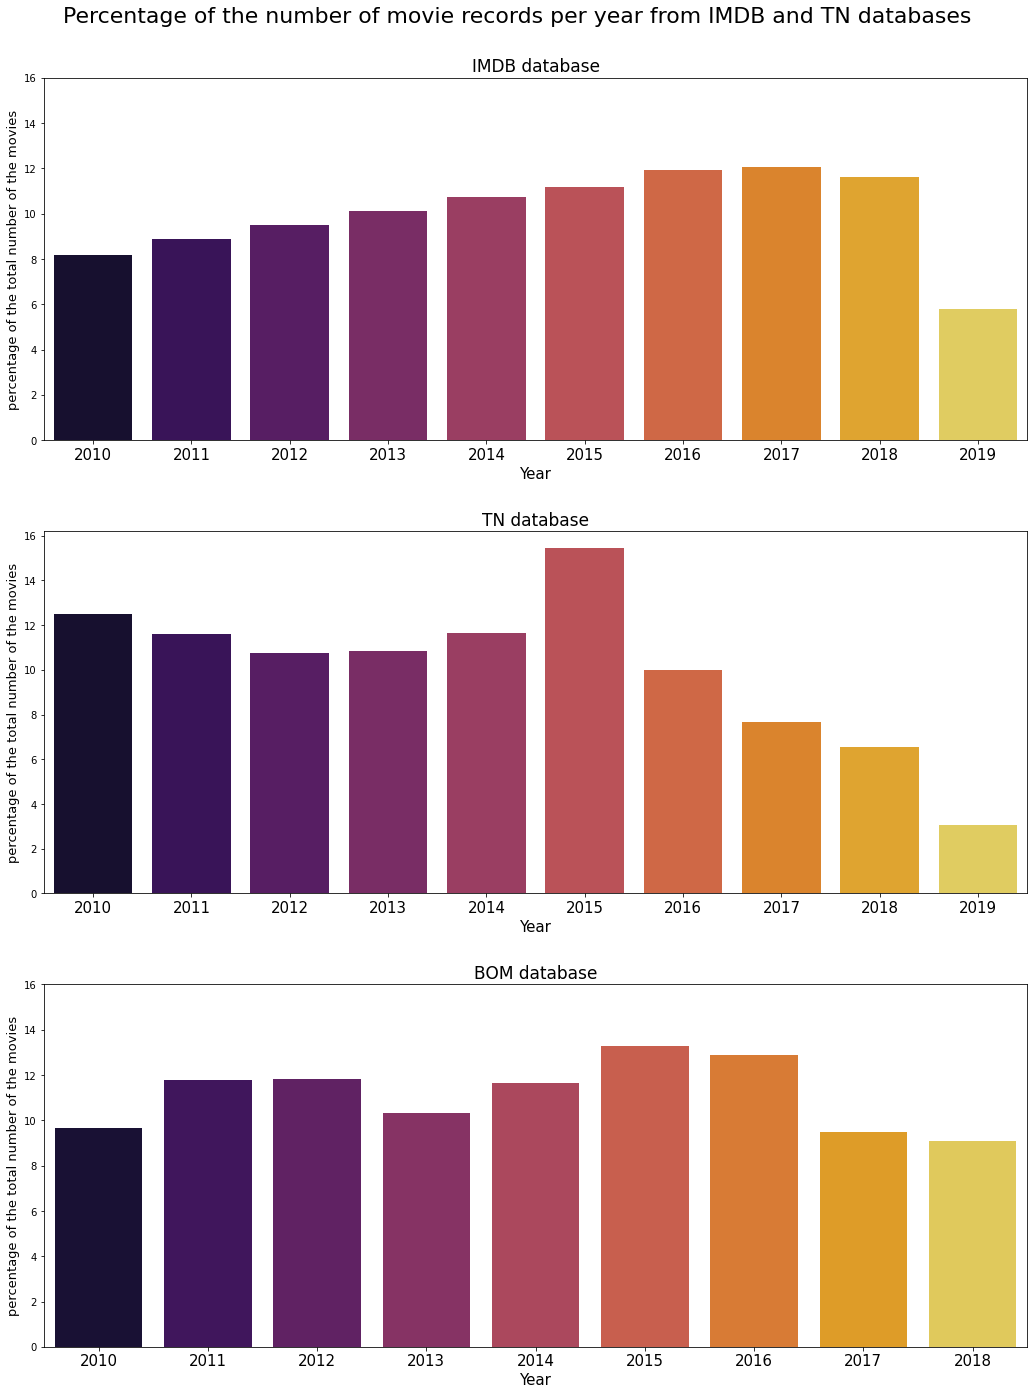

In [75]:
fig, axes = plt.subplots(figsize=(15,20), nrows=3)
fig.suptitle('Percentage of the number of movie records per year from IMDB and TN databases', fontsize=22)

sns.barplot(data=df_imdb_year, x='start_year', y='percentage_of_all', ax=axes[0], palette ='inferno')

axes[0].set_title('IMDB database', fontsize=17)
axes[0].set_ylabel('percentage of the total number of the movies', fontsize=13)
axes[0].set_xlabel('Year', fontsize=15)
axes[0].set_xticklabels(df_imdb_year['start_year'], fontsize=15)
axes[0].set_ylim(0, 16)

sns.barplot(data=df_tn_year, x='year',  y='percentage_of_all', ax=axes[1], palette ='inferno')

axes[1].set_title('TN database', fontsize=17)
axes[1].set_ylabel('percentage of the total number of the movies', fontsize=13)
axes[1].set_xlabel('Year', fontsize=15)
axes[1].set_xticklabels(df_tn_year['year'], fontsize=15) 

sns.barplot(data=df_bom_year, x='year',  y='percentage_of_all', ax=axes[2], palette ='inferno')

axes[2].set_title('BOM database', fontsize=17)
axes[2].set_ylabel('percentage of the total number of the movies', fontsize=13)
axes[2].set_xlabel('Year', fontsize=15)
axes[2].set_xticklabels(df_bom_year['year'], fontsize=15) 
axes[2].set_ylim(0, 16)
plt.tight_layout(pad=3)


## Joining the tables by movie titles  

### bom_movie_gross with tn_movie_budget into df_tn_bom DataFrame and a new table ROI_tn_bom
*** 
* * These tables need to be joined on two column, title and year, because there are movies with the same title but different years on release
* I dropped the rows that have ROI < -99% due to unreliability of the data
* Data from this process is going to be used to identify the **most successful studios** (the highest median ROI is the measurement of success), overall distribution of ROI (domestic and worldwide) as box plots per year, and the most successful months of the year (highest median ROI per month of the year)
* The DataFrame with all financial measure is going to be saved for future use and visuals, there are **1208** record matched
***

In [218]:
q="""SELECT title, bom.year, month, studio, production_budget, tn.domestic_gross 'domestic_gross', 
     worldwide_gross from tn_movie_budgets_test tn
     JOIN bom_movie_gross_test bom ON
     (tn.movie=bom.title) AND (tn.year=bom.year)"""

df_tn_bom = table_query(q)

for i in range(len(df_tn_bom['domestic_gross'])):
    row = df_tn_bom['domestic_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_bom['domestic_gross'][i]=row_num
    
for i in range(len(df_tn_bom['production_budget'])):
    row = df_tn_bom['production_budget'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_bom['production_budget'][i]=row_num   
    
for i in range(len(df_tn_bom['worldwide_gross'])):
    row = df_tn_bom['worldwide_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_bom['worldwide_gross'][i]=row_num 

#df_tn_bom['diff'] = df_tn_bom['bom_domestic_gross']-df_tn_bom['tn_domestic_gross']
#df_tn_bom.loc[df_tn_bom['diff']==max(df_tn_bom['diff'])]
#df_tn_bom.sort_values('diff').tail(30)
df_tn_bom['domestic_revenue'] = df_tn_bom['domestic_gross'] - df_tn_bom['production_budget']
df_tn_bom['worldwide_revenue'] = df_tn_bom['worldwide_gross'] - df_tn_bom['production_budget']
df_tn_bom['ROI_domestic'] = df_tn_bom['domestic_revenue']/df_tn_bom['production_budget']*100
df_tn_bom['ROI_worldwide'] = df_tn_bom['worldwide_revenue']/df_tn_bom['production_budget']*100
df_tn_bom.drop(df_tn_bom.loc[df_tn_bom['ROI_worldwide']<=(-99.0)].index, inplace=True)
df_tn_bom.sort_values('ROI_worldwide')

<ipython-input-218-4340728f37e0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_bom['domestic_gross'][i]=row_num
<ipython-input-218-4340728f37e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_bom['production_budget'][i]=row_num
<ipython-input-218-4340728f37e0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_bom['worldwide_gross'][i]=row_num


,title,year,month,studio,production_budget,domestic_gross,worldwide_gross,domestic_revenue,worldwide_revenue,ROI_domestic,ROI_worldwide
1102,13 Sins,2014,4,RTWC,4e+06,9134,47552,-3.99087e+06,-3.95245e+06,-99.7716,-98.8112
834,The Last Godfather,2011,4,RAtt.,1.34e+07,164247,164247,-1.32358e+07,-1.32358e+07,-98.7743,-98.7743
1202,They Will Have to Kill Us First,2016,3,BBC,600000,0,7943,-600000,-592057,-100,-98.6762
729,The Tempest,2010,12,Mira.,2e+07,277943,277943,-1.97221e+07,-1.97221e+07,-98.6103,-98.6103
953,Strangerland,2015,7,Alc,1e+07,17472,161097,-9.98253e+06,-9.8389e+06,-99.8253,-98.389
...,...,...,...,...,...,...,...,...,...,...,...
1115,Paranormal Activity 2,2010,10,Par.,3e+06,8.47529e+07,1.77512e+08,8.17529e+07,1.74512e+08,2725.1,5817.07
1177,Unfriended,2015,4,Uni.,1e+06,3.27896e+07,6.43642e+07,3.17896e+07,6.33642e+07,3178.96,6336.42
1171,Insidious,2011,4,FD,1.5e+06,5.40092e+07,9.98709e+07,5.25092e+07,9.83709e+07,3500.61,6558.06
1176,The Devil Inside,2012,1,Par.,1e+06,5.32629e+07,1.01759e+08,5.22629e+07,1.00759e+08,5226.29,10075.9


In [219]:
df_tn_bom.to_sql('ROI_tn_bom', conn, if_exists='replace', index = False)

In [220]:
display_tableDF_info('ROI_tn_bom')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1208 non-null   object 
 1   year               1208 non-null   int64  
 2   month              1208 non-null   int64  
 3   studio             1208 non-null   object 
 4   production_budget  1208 non-null   float64
 5   domestic_gross     1208 non-null   float64
 6   worldwide_gross    1208 non-null   float64
 7   domestic_revenue   1208 non-null   float64
 8   worldwide_revenue  1208 non-null   float64
 9   ROI_domestic       1208 non-null   float64
 10  ROI_worldwide      1208 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 103.9+ KB


In [182]:
conn.commit()

### imdb_title_basics with tn_movie_budget into df_tn_imdb DataFrame and a new table ROI_tn_imdb
*** 
* These tables need to be joined on two column, title and year, because there are movies with the same title but different years on release
* I dropped the rows that have ROI < -99% due to unreliability of the data
* Data from this process is going to be used to identify the **most successful genres** (the highest median ROI is the measurement of success) and overall distribution of ROI (domestic and world wide) as box plots per year and  and the most successful months of the year (highest median ROI per month of the year)
* Additional visual will include runtime (buckets) with their average ROI per year (the idea is that over time shorter runtime translates into more profitability
* The DataFrame with all financial measure is going to be saved for future use and visuals, there are **1388** record matched
***

In [502]:
q="""SELECT DISTINCT tconst, primary_title 'title', start_year 'year', month, runtime_minutes, production_budget, tn.domestic_gross 'domestic_gross',
     worldwide_gross FROM imdb_title_basics_test imdb
     JOIN tn_movie_budgets_test tn
     ON (imdb.primary_title=tn.movie) AND (imdb.start_year=tn.year)"""

df_tn_imdb = table_query(q)

for i in range(len(df_tn_imdb['domestic_gross'])):
    row = df_tn_imdb['domestic_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb['domestic_gross'][i]=row_num
    
for i in range(len(df_tn_imdb['production_budget'])):
    row = df_tn_imdb['production_budget'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb['production_budget'][i]=row_num   
    
for i in range(len(df_tn_imdb['worldwide_gross'])):
    row = df_tn_imdb['worldwide_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb['worldwide_gross'][i]=row_num 

df_tn_imdb['domestic_revenue'] = df_tn_imdb['domestic_gross'] - df_tn_imdb['production_budget']
df_tn_imdb['worldwide_revenue'] = df_tn_imdb['worldwide_gross'] - df_tn_imdb['production_budget']
df_tn_imdb['ROI_domestic'] = df_tn_imdb['domestic_revenue']/df_tn_imdb['production_budget']*100
df_tn_imdb['ROI_worldwide'] = df_tn_imdb['worldwide_revenue']/df_tn_imdb['production_budget']*100
df_tn_imdb.drop(df_tn_imdb.loc[df_tn_imdb['ROI_worldwide']<=(-99.0)].index, inplace=True)
#df_tn_imdb.sort_values('ROI_worldwide')
df_tn_imdb

<ipython-input-502-addbfed950b6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb['domestic_gross'][i]=row_num
<ipython-input-502-addbfed950b6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb['production_budget'][i]=row_num
<ipython-input-502-addbfed950b6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb['worldwide_gross'][i]=row_num


,tconst,title,year,month,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_revenue,worldwide_revenue,ROI_domestic,ROI_worldwide
1,tt0359950,The Secret Life of Walter Mitty,2013,12,114.0,9.1e+07,5.82368e+07,1.87861e+08,-3.27632e+07,9.68612e+07,-36.0035,106.441
2,tt0365907,A Walk Among the Tombstones,2014,9,114.0,2.8e+07,2.60177e+07,6.21086e+07,-1.98232e+06,3.41086e+07,-7.0797,121.816
3,tt0369610,Jurassic World,2015,6,124.0,2.15e+08,6.52271e+08,1.64885e+09,4.37271e+08,1.43385e+09,203.382,666.909
4,tt0376136,The Rum Diary,2011,10,119.0,4.5e+07,1.31098e+07,2.15447e+07,-3.18902e+07,-2.34553e+07,-70.8671,-52.1228
5,tt0383010,The Three Stooges,2012,4,92.0,3e+07,4.43382e+07,5.40522e+07,1.43382e+07,2.40522e+07,47.7941,80.1742
...,...,...,...,...,...,...,...,...,...,...,...,...
1537,tt8155288,Happy Death Day 2U,2019,2,100.0,9e+06,2.8051e+07,6.41795e+07,1.9051e+07,5.51795e+07,211.678,613.106
1541,tt8632862,Fahrenheit 11/9,2018,9,128.0,5e+06,6.35231e+06,6.65372e+06,1.35231e+06,1.65372e+06,27.0461,33.0743
1543,tt9024106,Unplanned,2019,3,106.0,6e+06,1.81076e+07,1.81076e+07,1.21076e+07,1.21076e+07,201.794,201.794
1544,tt9347476,Believe,2016,12,NaN,3.5e+06,890303,890303,-2.6097e+06,-2.6097e+06,-74.5628,-74.5628


In [55]:
#Creating a new table
df_tn_imdb.to_sql('ROI_tn_imdb', conn, if_exists='replace', index = False)

In [57]:
conn.commit()

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### Exploratory Analysis of studio profitability data and Visualization of the results

##### Using information in TheNumbers data in conjunction with IMDB data

In [223]:
len(df_tn_bom['studio'].unique())

95

In [173]:
q="""SELECT count(*) num_movies, avg(ROI_domestic) ROI, year,
     studio FROM ROI_tn_bom GROUP BY studio, year"""
df_studios_d=table_query(q)

In [186]:
#Only studios with a number of movies per each year of the period 2009-2018 are being considered in this segment
#From this pool studios with very low profitability are removed to make visualization more prominent
df_studios_d.drop(df_studios_d.loc[df_studios_d['num_movies']<=6].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='IFC'].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='LG/S'].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='Magn.'].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='RAtt.'].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='Rela.'].index, inplace=True)
df_studios_d.drop(df_studios_d.loc[df_studios_d['studio']=='SPC'].index, inplace=True)

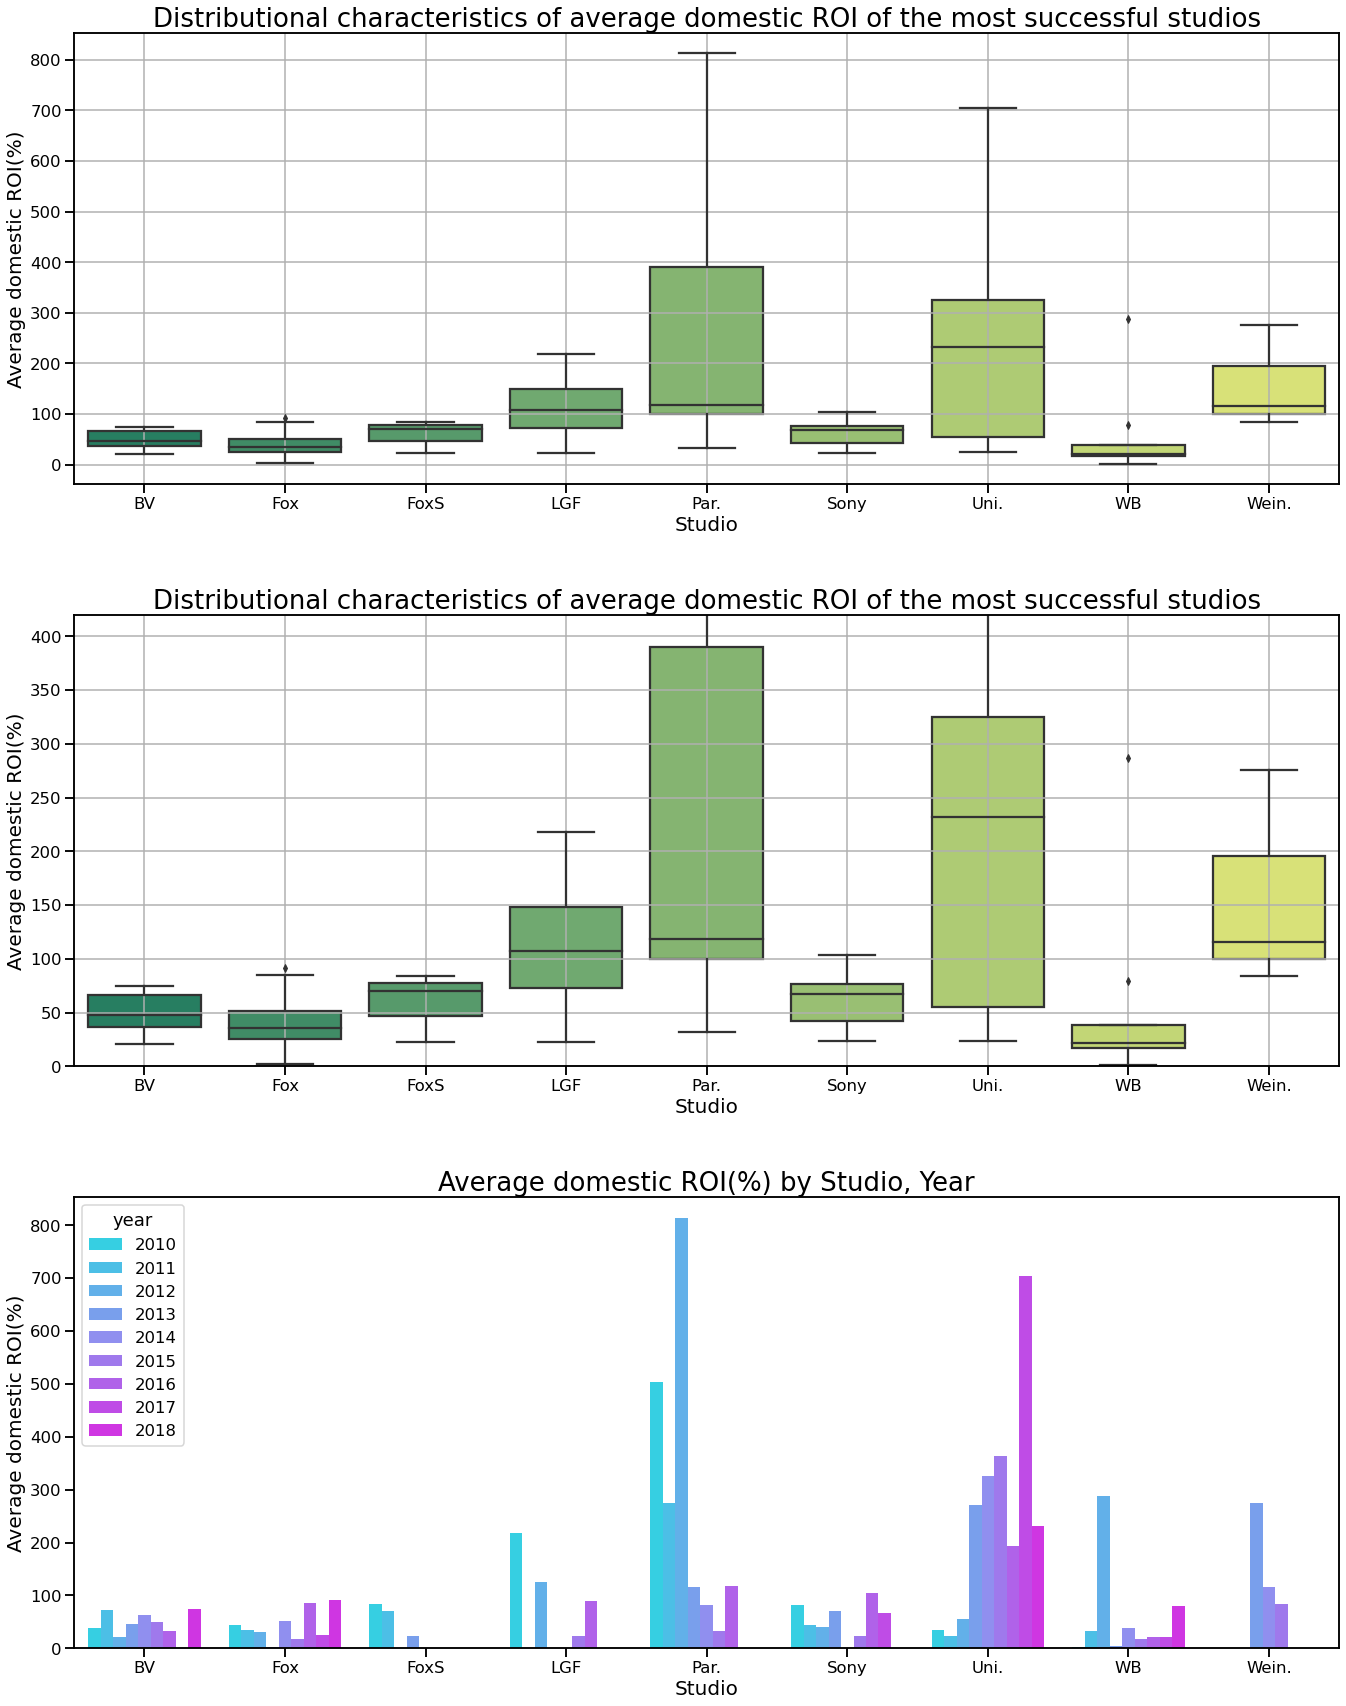

In [187]:
fig, axes = plt.subplots(figsize=(20,25), nrows=3)
sns.boxplot(data=df_studios_d, x="studio", y= "ROI", palette='summer', ax=axes[0])
sns.boxplot(data=df_studios_d, x="studio", y= "ROI", palette='summer', ax=axes[1])
sns.barplot(data=df_studios_d, x="studio", y="ROI", hue="year", palette='cool', ax=axes[2]);

axes[0].set_title("Distributional characteristics of average domestic ROI of the most successful studios", fontsize=26);
axes[0].grid();
axes[0].set_ylabel('Average domestic ROI(%)', fontsize=20);
axes[0].set_xlabel('Studio', fontsize=20);


axes[1].set_title("Distributional characteristics of average domestic ROI of the most successful studios", fontsize=26);
axes[1].set_ylim(0, 420);
axes[1].set_ylabel('Average domestic ROI(%)', fontsize=20);
axes[1].set_xlabel('Studio', fontsize=20);
axes[1].grid();

axes[2].set_title("Average domestic ROI(%) by Studio, Year", fontsize=26);
axes[2].set_ylabel('Average domestic ROI(%)', fontsize=20)
axes[2].set_xlabel('Studio', fontsize=20);


plt.tight_layout(pad=3)
#sns.set_context("talk");

##### Using information in TheNumbers data in conjunction with Box-Office Movie data

<div class="alert alert-block alert-info">
The next step is to investigate worldwide profitability of the movies in the database by using the same approach as above.
</div>

In [178]:
q="""SELECT count(*) num_movies, avg(ROI_worldwide) ROI, year,
     studio FROM ROI_tn_bom GROUP BY studio, year"""
df_studios_w=table_query(q)

In [183]:
#Only studios with a number of movies per each year of the period 2009-2018 are being considered in this segment
#From this pool studios with very low profitability are removed to make visualization more prominent
df_studios_w.drop(df_studios_w.loc[df_studios_w['num_movies']<=6].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='IFC'].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='LG/S'].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='Magn.'].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='RAtt.'].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='Rela.'].index, inplace=True)
df_studios_w.drop(df_studios_w.loc[df_studios_w['studio']=='SPC'].index, inplace=True)

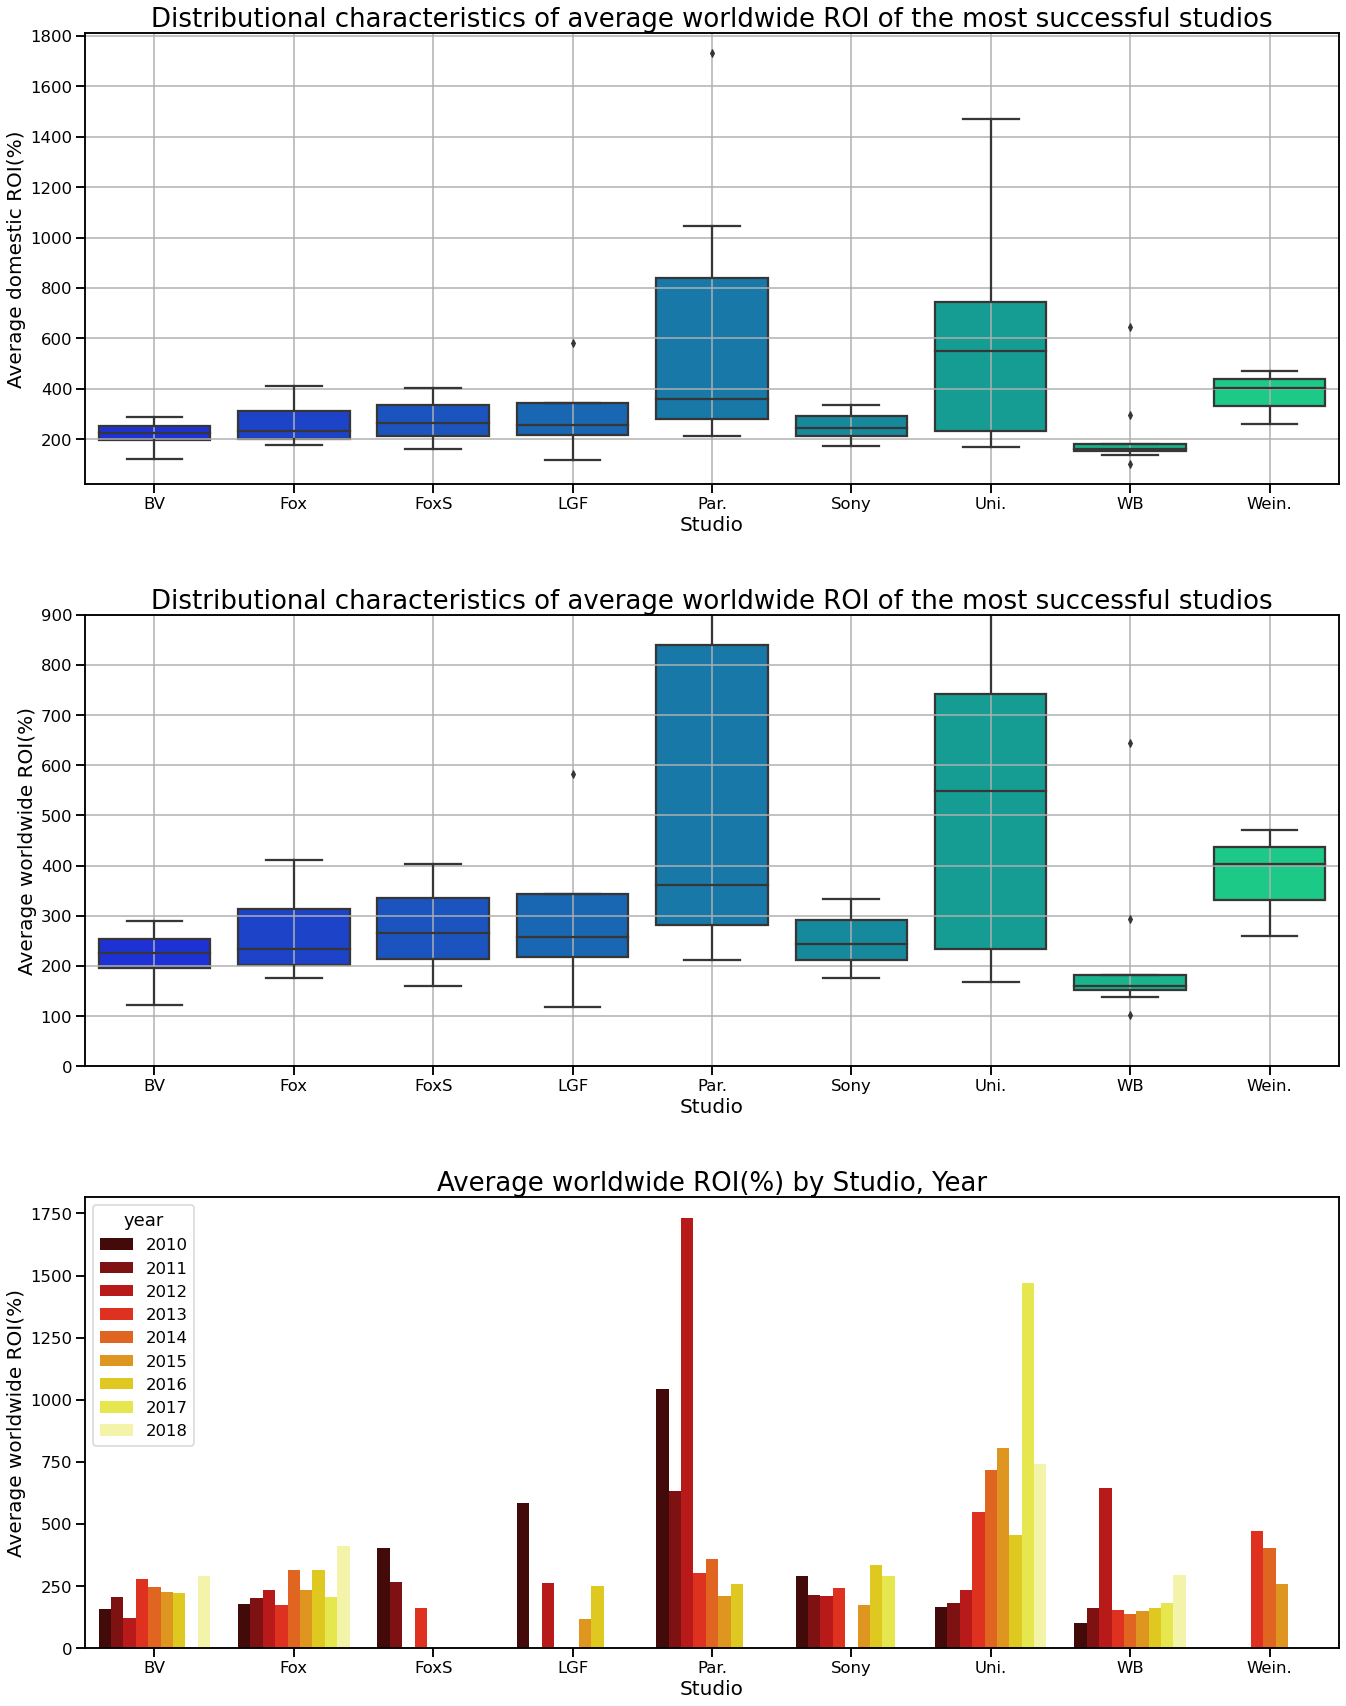

In [185]:
fig, axes = plt.subplots(figsize=(20,25), nrows=3)
sns.boxplot(data=df_studios_w, x="studio", y= "ROI", palette='winter', ax=axes[0])
sns.boxplot(data=df_studios_w, x="studio", y= "ROI", palette='winter', ax=axes[1])
sns.barplot(data=df_studios_w, x="studio", y="ROI", hue="year", palette='hot', ax=axes[2]);

axes[0].set_title("Distributional characteristics of average worldwide ROI of the most successful studios", fontsize=26);
axes[0].grid();
axes[0].set_ylabel('Average domestic ROI(%)', fontsize=20);
axes[0].set_xlabel('Studio', fontsize=20);


axes[1].set_title("Distributional characteristics of average worldwide ROI of the most successful studios", fontsize=26);
axes[1].set_ylim(0, 900);
axes[1].set_ylabel('Average worldwide ROI(%)', fontsize=20);
axes[1].set_xlabel('Studio', fontsize=20);
axes[1].grid();

axes[2].set_title("Average worldwide ROI(%) by Studio, Year", fontsize=26);
axes[2].set_ylabel('Average worldwide ROI(%)', fontsize=20)
axes[2].set_xlabel('Studio', fontsize=20);


plt.tight_layout(pad=3)
#sns.set_context("talk");

#### Conclusion of the analysis of the data above, based on Box-Office Mojo  and TheNumbers financial data:
<div class="alert alert-block alert-info">
Universal Studios, Paramount Pictures, The Weinstein Company and Lions Gate Films Corporation studios (in that order) have been the most successful studios over the course of the last 9 years. The median of the average domestic ROI for these studios is above 100 % and lower and upper quartiles are between 50% and 400% with wiskers of all four never going below the red line.<br>
&#8195;<br>The same tendencies can be observed in the analysis of worldwide profitability of movies by major players in the industry. Universal Studios, Paramount Picture, The Weinstein Company and Lions Gate Films Corporation studios remain the most successful American studios on the world scene. However, all of the studios under consideration maintained average ROI above 100%.
</div>

### Exploratory Analysis of runtime changes over the last 10 years and its' possible correlation with profitability

In [209]:
q="""SELECT  year, AVG(runtime_minutes) average_runtime FROM ROI_tn_imdb GROUP BY year"""
df_runtime=table_query(q)
df_runtime

,year,average_runtime
0,2010,104.907407
1,2011,104.884393
2,2012,108.260563
3,2013,109.537037
4,2014,108.159236
5,2015,108.112500
6,2016,109.915033
7,2017,108.932203
8,2018,111.818966
9,2019,112.531250


In [216]:
df_ROI_runtime= display_tableDF('ROI_tn_imdb')

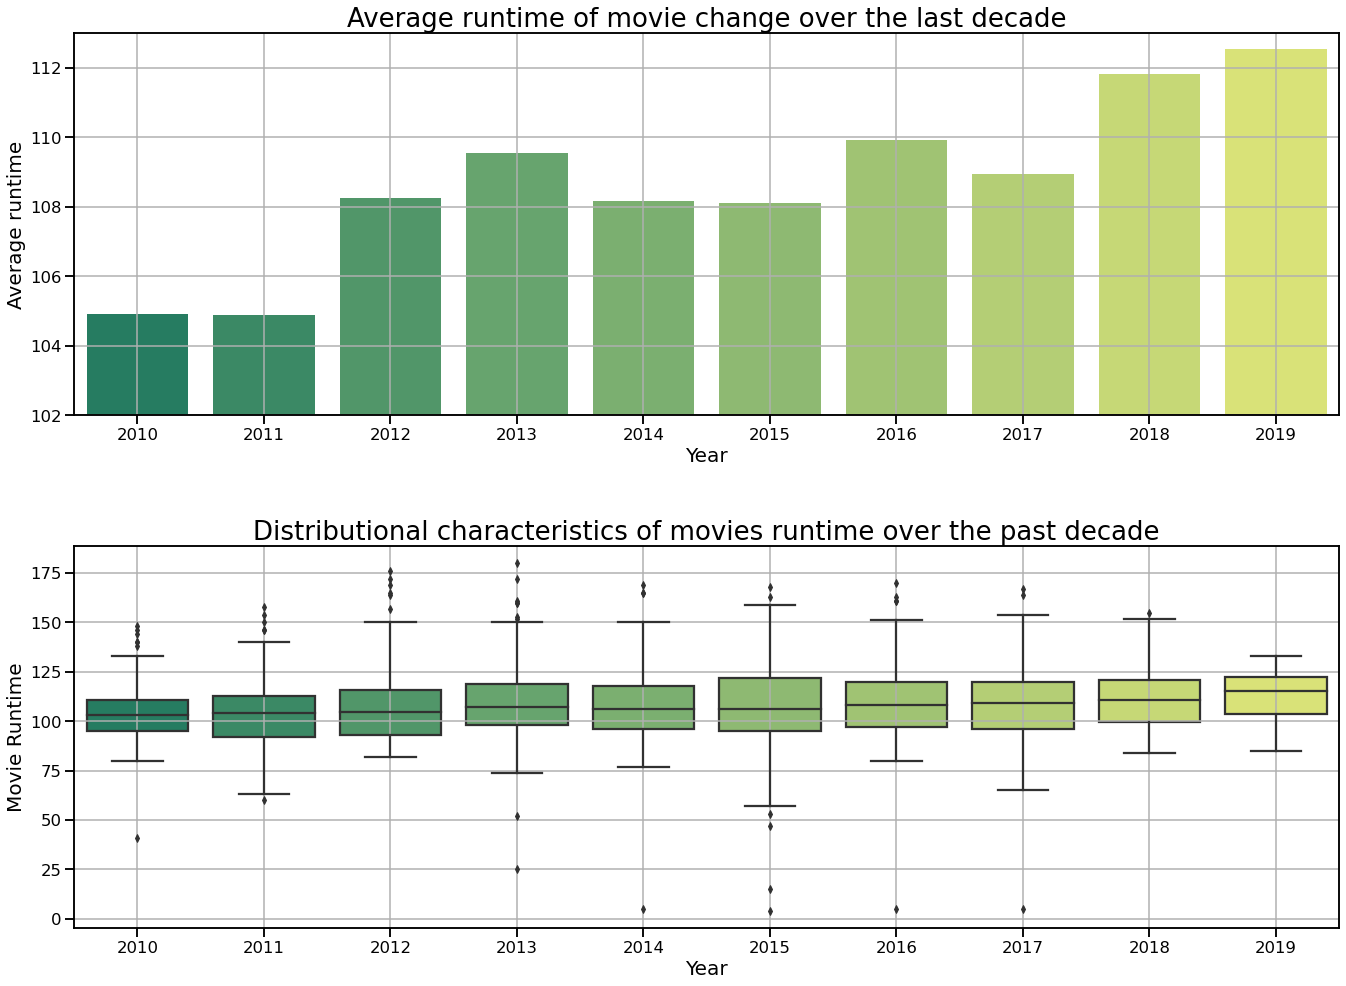

In [224]:
fig, axes = plt.subplots(figsize=(20,15), nrows=2)
sns.barplot(data=df_runtime, x="year", y="average_runtime", palette='summer',ax=axes[0]);

axes[0].set_ylim(102, 113);
axes[0].set_title("Average runtime of movie change over the last decade", fontsize=26);
axes[0].set_ylabel('Average runtime', fontsize=20);
axes[0].set_xlabel('Year', fontsize=20);
axes[0].grid();

sns.boxplot(data=df_ROI_runtime, x="year", y="runtime_minutes", palette='summer',ax=axes[1]);

axes[1].set_title("Distributional characteristics of movies runtime over the past decade", fontsize=26);
axes[1].set_ylabel('Movie Runtime', fontsize=20);
axes[1].set_xlabel('Year', fontsize=20);
axes[1].grid();

plt.tight_layout(pad=3)

#### Conclusion of the analysis of the data above:
<div class="alert alert-block alert-info">
Though the average runtime of a movie within the industry grew between years 2010 and 2019, the tendency is very weakly pronounced and is within the margin of error<br>
</div>

### ROI statistics evaluation

In [219]:
q="""SELECT  year, ROI_domestic, ROI_worldwide FROM ROI_tn_imdb"""
df_ROI_stat=table_query(q)
df_ROI_stat.describe()

,year,ROI_domestic,ROI_worldwide
count,1388.000000,1388.000000,1388.000000
mean,2013.888329,100.937681,304.048304
std,2.612389,681.511253,1248.468460
min,2010.000000,-100.000000,-98.906170
25%,2012.000000,-55.890353,8.420845
50%,2014.000000,2.602221,135.418452
75%,2016.000000,110.078026,320.349247
max,2019.000000,22664.410000,41556.474000


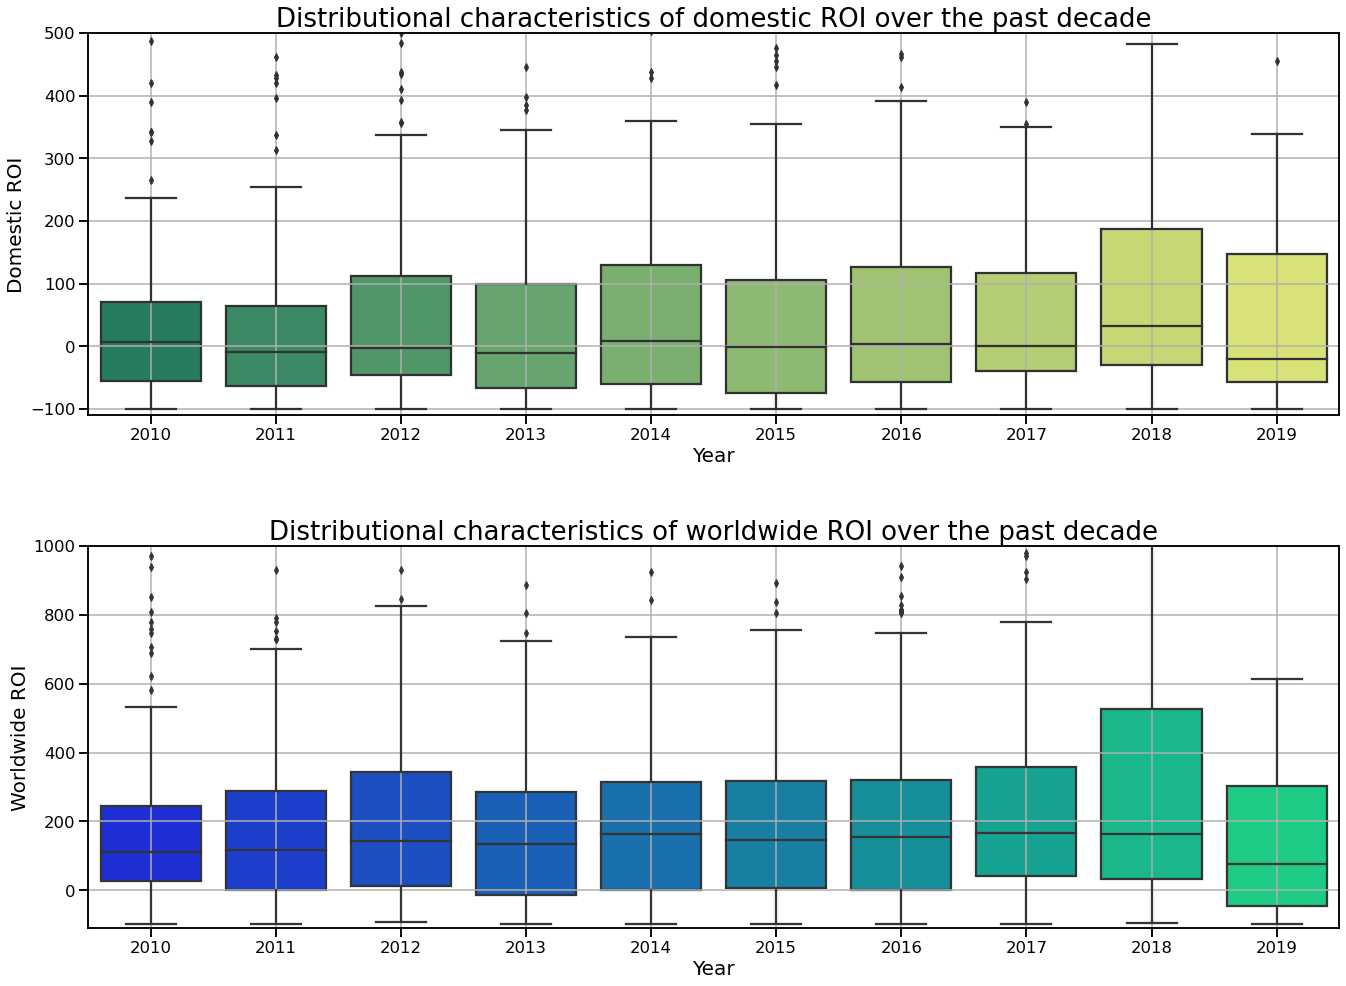

In [226]:
fig, axes = plt.subplots(figsize=(20,15), nrows=2)
sns.boxplot(data=df_ROI_stat, x="year", y="ROI_domestic", palette='summer',ax=axes[0]);

axes[0].set_ylim(-110, 500);
axes[0].set_title("Distributional characteristics of domestic ROI over the past decade", fontsize=26);
axes[0].set_ylabel('Domestic ROI', fontsize=20);
axes[0].set_xlabel('Year', fontsize=20);
axes[0].grid();

sns.boxplot(data=df_ROI_stat, x="year", y="ROI_worldwide", palette='winter',ax=axes[1]);

axes[1].set_ylim(-110, 1000);
axes[1].set_title("Distributional characteristics of worldwide ROI over the past decade", fontsize=26);
axes[1].set_ylabel('Worldwide ROI', fontsize=20);
axes[1].set_xlabel('Year', fontsize=20);
axes[1].grid();

plt.tight_layout(pad=3)

#### Conclusion of the analysis of the data above:
<div class="alert alert-block alert-info">
Though the distribution of domestic ROI shows that the median of it over the years is remaining close to 0%, the overall tendency is shifter toward the upper quartile and the mean close to 100% <br>
The distribution of worldwide ROI assures a more promising outcome for a newcoming studio with lower and upper quartiles above 0% and the mean of the distribution slightly above 300%.<br><br>
A customer should be advised to expand into foreign markets to increase their overall profit. Additional analysis is suggested for the most promising foreign markets (needs more data)
</div>

### Exploratory analysis of month of release/ROI correlation

#### Analysis based on joined ROI_tn_imdb table

In [371]:
q="""SELECT  month, ROI_domestic, ROI_worldwide FROM ROI_tn_imdb"""
df_ROI_stat_month=table_query(q)
df_ROI_stat_month

#months={1:'January', 2: 'February', 3:'March', 4:'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
#         9: 'September', 10: 'October', 11: 'November', 12: 'December'}
#df_ROI_stat_month['month']=df_ROI_stat_month['month'].map(months)

,month,ROI_domestic,ROI_worldwide
0,12,-36.003475,106.440860
1,9,-7.079696,121.816382
2,6,203.381686,666.909239
3,10,-70.867078,-52.122818
4,4,47.794080,80.174163
...,...,...,...
1383,2,211.678278,613.105500
1384,9,27.046120,33.074300
1385,3,201.793683,201.793683
1386,12,-74.562771,-74.562771


In [372]:
q="""SELECT  month, count(*) num_movies FROM ROI_tn_imdb GROUP by month"""
df_num_month=table_query(q)
df_num_month

months={1:'January', 2: 'February', 3:'March', 4:'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
         9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_num_month['month']=df_num_month['month'].map(months)
df_num_month

,month,num_movies
0,January,68
1,February,86
2,March,123
3,April,98
4,May,93
5,June,116
6,July,118
7,August,114
8,September,138
9,October,149


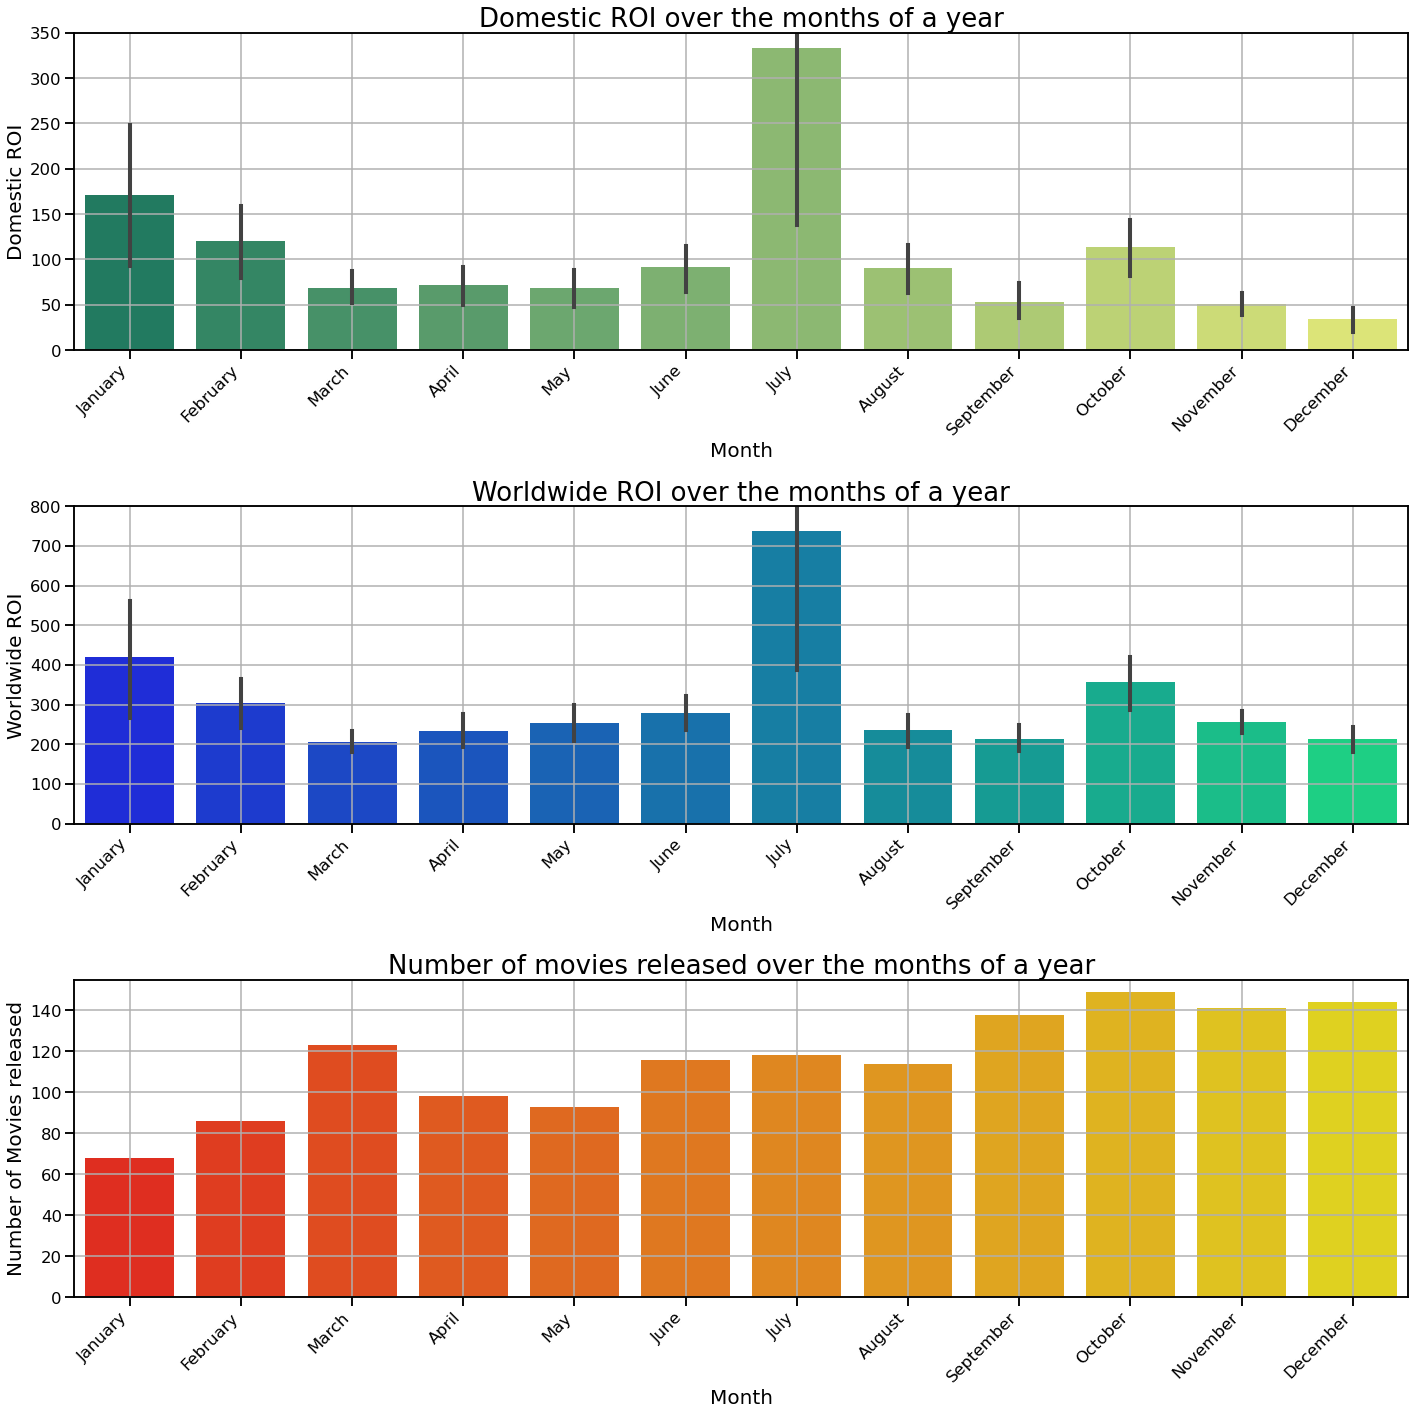

In [490]:
fig, axes = plt.subplots(figsize=(20,20), nrows=3)
sns.barplot(data=df_ROI_stat_month, x="month", y="ROI_domestic", palette='summer',ax=axes[0], ci=65);

axes[0].set_ylim(0, 350);
axes[0].set_title("Domestic ROI over the months of a year", fontsize=26);
axes[0].set_ylabel('Domestic ROI', fontsize=20);
axes[0].set_xlabel('Month', fontsize=20);
axes[0].set_xticklabels(['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 
         'September', 'October', 'November', 'December'], rotation=45, ha='right')
axes[0].grid();

sns.barplot(data=df_ROI_stat_month, x="month", y="ROI_worldwide", palette='winter',ax=axes[1], ci=65);

axes[1].set_ylim(0, 800);
axes[1].set_title('Worldwide ROI over the months of a year', fontsize=26);
axes[1].set_ylabel('Worldwide ROI', fontsize=20);
axes[1].set_xlabel('Month', fontsize=20);
axes[1].set_xticklabels(['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 
         'September', 'October', 'November', 'December'], rotation=45, ha='right')
axes[1].grid();

sns.barplot(data=df_num_month, x="month", y="num_movies", palette='autumn',ax=axes[2], ci=65);

axes[2].set_ylim(0, 155);
axes[2].set_title("Number of movies released over the months of a year", fontsize=26);
axes[2].set_ylabel('Number of Movies released', fontsize=20);
axes[2].set_xlabel('Month', fontsize=20);
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].grid();

plt.tight_layout()

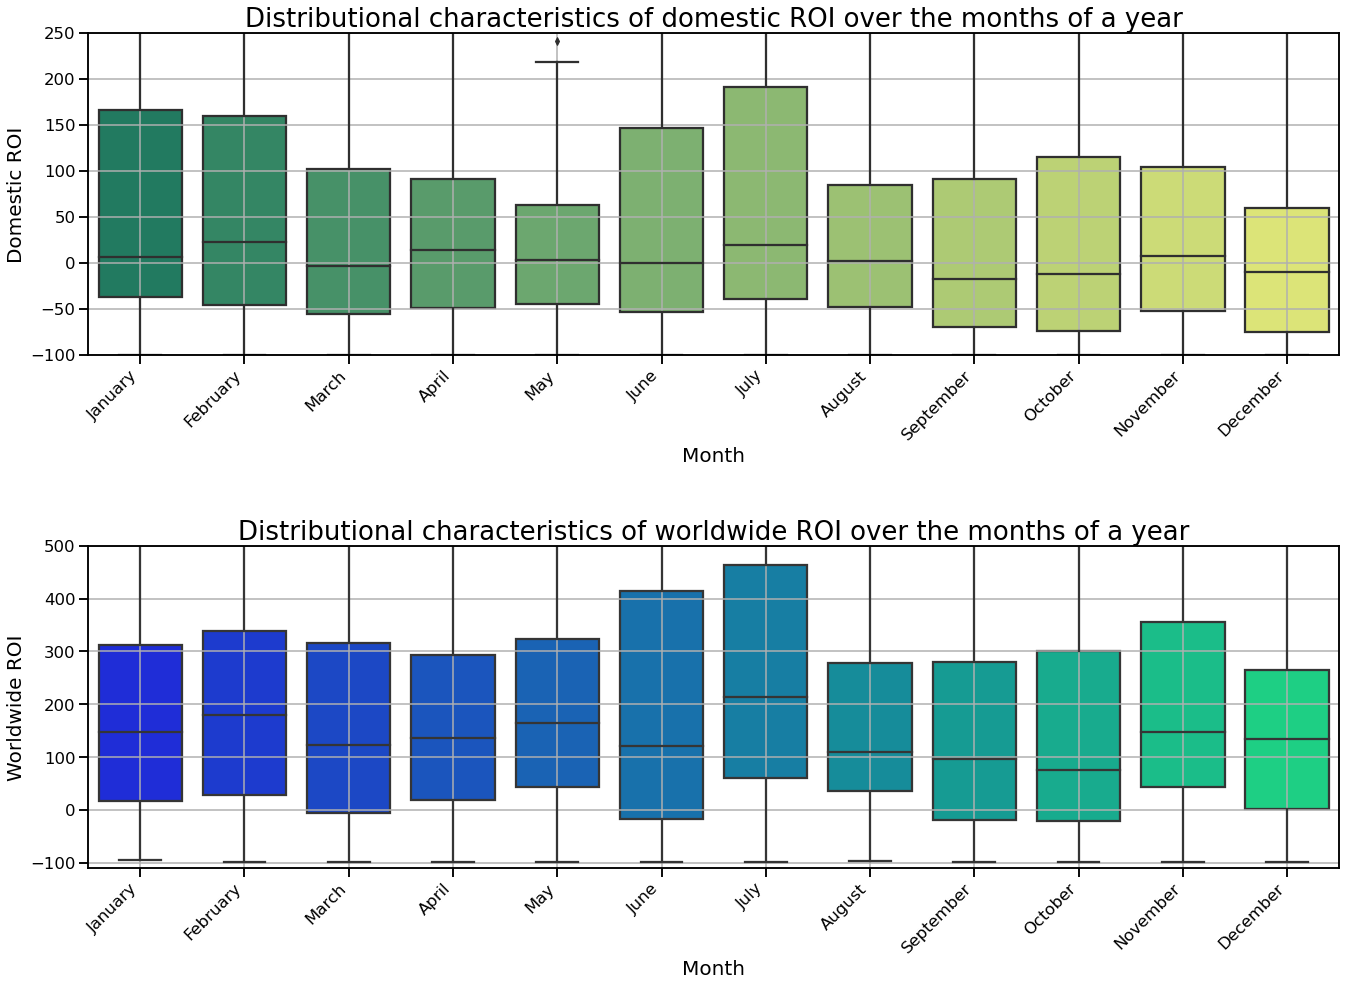

In [377]:
fig, axes = plt.subplots(figsize=(20,15), nrows=2)
sns.boxplot(data=df_ROI_stat_month, x="month", y="ROI_domestic", palette='summer',ax=axes[0]);

axes[0].set_ylim(-100, 250);
axes[0].set_title("Distributional characteristics of domestic ROI over the months of a year", fontsize=26);
axes[0].set_ylabel('Domestic ROI', fontsize=20);
axes[0].set_xlabel('Month', fontsize=20);
axes[0].set_xticklabels(['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 
         'September', 'October', 'November', 'December'], rotation=45, ha='right')
axes[0].grid();

sns.boxplot(data=df_ROI_stat_month, x="month", y="ROI_worldwide", palette='winter',ax=axes[1]);

axes[1].set_ylim(-110, 500);
axes[1].set_title("Distributional characteristics of worldwide ROI over the months of a year", fontsize=26);
axes[1].set_ylabel('Worldwide ROI', fontsize=20);
axes[1].set_xlabel('Month', fontsize=20);
axes[1].set_xticklabels(['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 
         'September', 'October', 'November', 'December'], rotation=45, ha='right')
axes[1].grid();

plt.tight_layout(pad=3)

#### Exploring correlations between average ROIs (domestic and worldwide)
<div class="alert alert-block alert-info">
The data above suggests that there might be a negative correlation between the number of the movies released and the ROI (domestic and worldwide) which might be related to the choice of released movies customers have in a particular month as well as holidays and weather in each month 
</div>

In [405]:
q="""SELECT  month, AVG(ROI_domestic) AVG_dom_ROI, AVG(ROI_worldwide) AVG_ww_ROI, count(*) num_movies FROM ROI_tn_imdb GROUP by month"""
df_ROI_month_num=table_query(q)
df_ROI_month_num
df_ROI_month_num.corr(method='pearson')

,month,AVG_dom_ROI,AVG_ww_ROI,num_movies
month,1.000000,-0.251537,-0.114142,0.882608
AVG_dom_ROI,-0.251537,1.000000,0.980399,-0.274592
AVG_ww_ROI,-0.114142,0.980399,1.000000,-0.162320
num_movies,0.882608,-0.274592,-0.162320,1.000000


<div class="alert alert-block alert-success">There are negative correlations indeed. 
 They are not very strong ones and the correlation with the average  ROI is less pronounced abroad. The fact of the difference might be related to the fact that all three factors, number of released movies, holidays and weather, domestically and abroad are different and the picture is less pronounced
</div>

#### Visual exploration of the correlations between average ROIs (domestic and worldwide)
<div class="alert alert-block alert-info">
Due to the fact that visual information is consumed by general public easier, the correlation is presented in a visual form.
</div>

In [456]:
months={1:'January', 2: 'February', 3:'March', 4:'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
                 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_ROI_month_num['month']=df_ROI_month_num['month'].map(months)
df_ROI_month_num

,month,AVG_dom_ROI,AVG_ww_ROI,num_movies
0,January,171.390237,419.234690,68
1,February,119.888883,304.706920,86
2,March,68.399687,206.108429,123
3,April,71.700163,234.234485,98
4,May,68.384754,253.086232,93
5,June,91.143942,278.057627,116
6,July,333.312316,736.334952,118
7,August,90.342197,234.981215,114
8,September,52.931118,214.220586,138
9,October,113.122930,358.019641,149


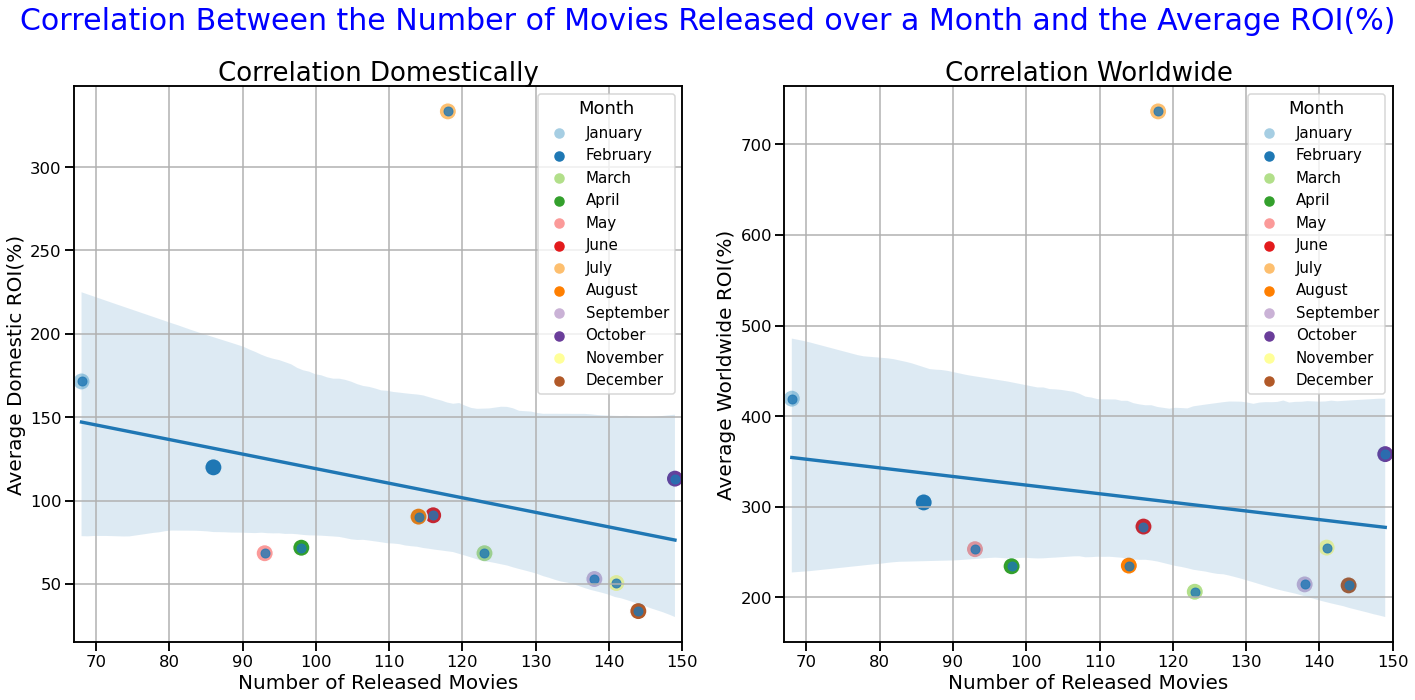

In [489]:
fig, axes = plt.subplots(figsize=(20,10), ncols=2)
sns.scatterplot(data=df_ROI_month_num, x="num_movies", y="AVG_dom_ROI", hue ='month', palette='Paired', s=300,
                  ax=axes[0])
sns.scatterplot(data=df_ROI_month_num, x="num_movies", y="AVG_ww_ROI", hue='month', palette='Paired', s=300,
               ax=axes[1])

sns.regplot(data=df_ROI_month_num, x="num_movies", y="AVG_dom_ROI", ax=axes[0])
sns.regplot(data=df_ROI_month_num, x="num_movies", y="AVG_ww_ROI", ax=axes[1])

axes[0].set_title("Correlation Domestically", fontsize=26);
axes[0].set_xlabel('Number of Released Movies', fontsize=20)
axes[0].set_ylabel('Average Domestic ROI(%)', fontsize=20)
axes[0].grid()
axes[0].set_xlim(67, 150);
axes[0].legend(title='Month', loc='upper right', fontsize=15)

axes[1].set_title("Correlation Worldwide", fontsize=26);
axes[1].set_ylabel('Average Worldwide ROI(%)', fontsize=20);
axes[1].set_xlabel('Number of Released Movies', fontsize=20);
axes[1].grid();
axes[1].set_xlim(67, 150);
axes[1].legend(title='Month', loc='upper right', fontsize=15)

plt.suptitle("Correlation Between the Number of Movies Released over a Month and the Average ROI(%)", size=30, c="Blue")
plt.tight_layout()

#### Conclusion of the analysis of the data above:
<div class="alert alert-block alert-success">
The negative correlation between the number of movies released over a time period suggests that the customer should consider this factor when planning a release of their movie. The only exception is a month of July, an outlier among other months of a year. It seems that no matter how many movies are in the theaters, it is going to be more profitable than in other months of a year.
</div>

### Exploratory Analysis of Genre effect on movies profitability and Visualization of the results

#### Exploration of Single Genre effect on ROI of a movie (domestic and worldwide)
<div class="alert alert-block alert-info">In this section we are going to explore how profitable movies of a particular genre are based on the data in IMDB and TN databases.
    </div>

In [509]:
q="""SELECT DISTINCT tconst, primary_title title, genres, start_year year, month, runtime_minutes,
     production_budget, tn.domestic_gross domestic_gross,
     worldwide_gross FROM imdb_title_basics_test imdb
     JOIN tn_movie_budgets_test tn
     ON (imdb.primary_title=tn.movie) AND (imdb.start_year=tn.year)"""

df_tn_imdb_genres = table_query(q)


for i in range(len(df_tn_imdb_genres['domestic_gross'])):
    row = df_tn_imdb_genres['domestic_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb_genres['domestic_gross'][i]=row_num
    
for i in range(len(df_tn_imdb_genres['production_budget'])):
    row = df_tn_imdb_genres['production_budget'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb_genres['production_budget'][i]=row_num   
    
for i in range(len(df_tn_imdb_genres['worldwide_gross'])):
    row = df_tn_imdb_genres['worldwide_gross'][i]
    row = row.replace(',', '').replace('$','')
    row_num = float(row)
    df_tn_imdb_genres['worldwide_gross'][i]=row_num 

df_tn_imdb_genres['domestic_revenue'] = df_tn_imdb_genres['domestic_gross'] - df_tn_imdb_genres['production_budget']
df_tn_imdb_genres['worldwide_revenue'] = df_tn_imdb_genres['worldwide_gross'] - df_tn_imdb_genres['production_budget']
df_tn_imdb_genres['ROI_domestic'] = df_tn_imdb_genres['domestic_revenue']/df_tn_imdb_genres['production_budget']*100
df_tn_imdb_genres['ROI_worldwide'] = df_tn_imdb_genres['worldwide_revenue']/df_tn_imdb_genres['production_budget']*100
df_tn_imdb_genres.drop(df_tn_imdb_genres.loc[df_tn_imdb_genres['ROI_worldwide']<=(-99.0)].index, inplace=True)
#df_tn_imdb.sort_values('ROI_worldwide')
df_tn_imdb_genres

<ipython-input-509-b44bcd7cfd4f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb_genres['domestic_gross'][i]=row_num
<ipython-input-509-b44bcd7cfd4f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb_genres['production_budget'][i]=row_num
<ipython-input-509-b44bcd7cfd4f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_imdb_genres['worldwide_gross'][i]=row_num


,tconst,title,genres,year,month,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_revenue,worldwide_revenue,ROI_domestic,ROI_worldwide
3,tt0359950,The Secret Life of Walter Mitty,Adventure,2013,12,114.0,9.1e+07,5.82368e+07,1.87861e+08,-3.27632e+07,9.68612e+07,-36.0035,106.441
4,tt0359950,The Secret Life of Walter Mitty,Comedy,2013,12,114.0,9.1e+07,5.82368e+07,1.87861e+08,-3.27632e+07,9.68612e+07,-36.0035,106.441
5,tt0359950,The Secret Life of Walter Mitty,Drama,2013,12,114.0,9.1e+07,5.82368e+07,1.87861e+08,-3.27632e+07,9.68612e+07,-36.0035,106.441
6,tt0365907,A Walk Among the Tombstones,Action,2014,9,114.0,2.8e+07,2.60177e+07,6.21086e+07,-1.98232e+06,3.41086e+07,-7.0797,121.816
7,tt0365907,A Walk Among the Tombstones,Crime,2014,9,114.0,2.8e+07,2.60177e+07,6.21086e+07,-1.98232e+06,3.41086e+07,-7.0797,121.816
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,tt8632862,Fahrenheit 11/9,Documentary,2018,9,128.0,5e+06,6.35231e+06,6.65372e+06,1.35231e+06,1.65372e+06,27.0461,33.0743
3880,tt9024106,Unplanned,Biography,2019,3,106.0,6e+06,1.81076e+07,1.81076e+07,1.21076e+07,1.21076e+07,201.794,201.794
3881,tt9024106,Unplanned,Drama,2019,3,106.0,6e+06,1.81076e+07,1.81076e+07,1.21076e+07,1.21076e+07,201.794,201.794
3882,tt9347476,Believe,Unknown,2016,12,NaN,3.5e+06,890303,890303,-2.6097e+06,-2.6097e+06,-74.5628,-74.5628


In [510]:
df_tn_imdb_genres.to_sql('ROI_tn_imdb_genres', conn, if_exists='replace', index = False)

In [511]:
conn.commit()

In [512]:
len(df_tn_imdb_genres['genres'].unique())

22

In [533]:
q="""SELECT count(*) num_movies, avg(ROI_domestic) ROI_d, avg(ROI_worldwide) ROI_w, genres 
     FROM ROI_tn_imdb_genres GROUP BY genres"""
df_ROI_genres=table_query(q)
df_ROI_genres

,num_movies,ROI_d,ROI_w,genres
0,410,14.016189,184.090202,Action
1,340,22.883264,217.499552,Adventure
2,97,43.555617,282.592459,Animation
3,130,81.652163,251.161007,Biography
4,474,82.976304,242.476102,Comedy
5,218,19.295245,130.768016,Crime
6,45,106.361963,230.621110,Documentary
7,672,79.986621,244.995889,Drama
8,87,45.364585,172.140462,Family
9,116,50.135361,235.957915,Fantasy


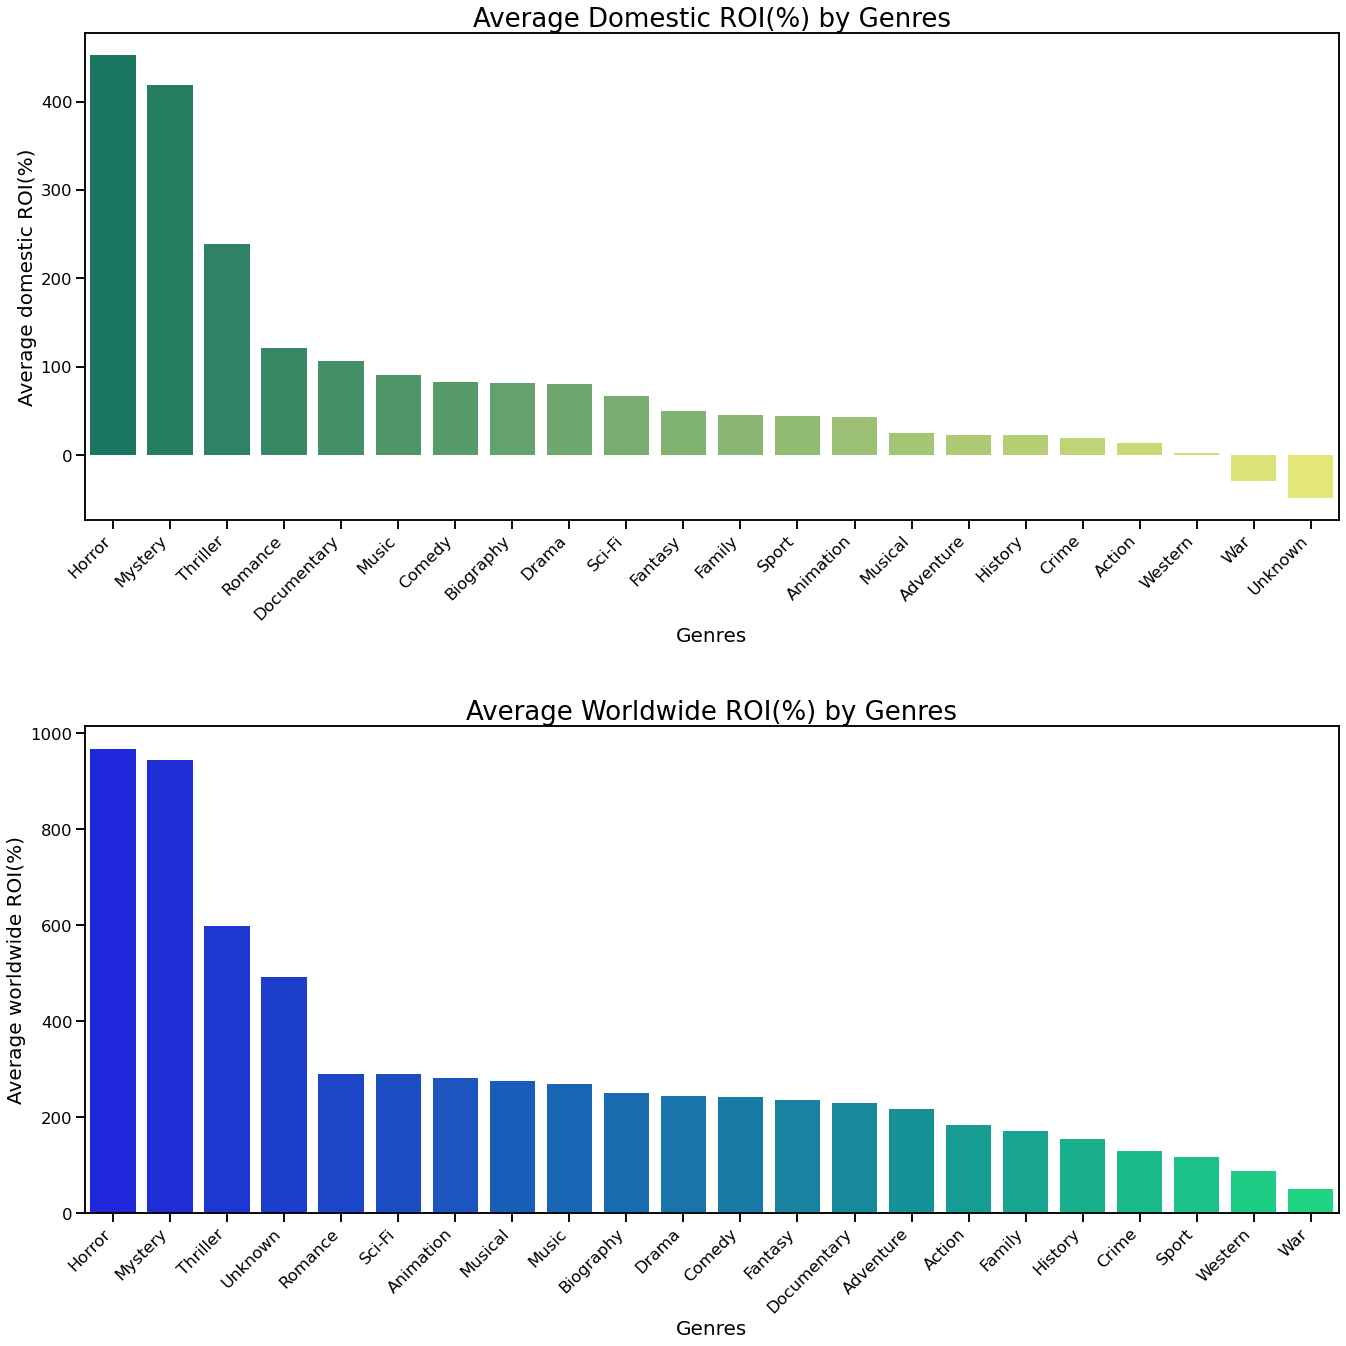

In [561]:
fig, axes = plt.subplots(figsize=(20,20), nrows=2)
#sns.boxplot(data=df_ROI_genres, x="genres", y= "ROI_d", palette='summer', ax=axes[0])
sns.barplot(data=df_ROI_genres, x="genres", y="ROI_d", palette='summer', 
            order=df_ROI_genres.sort_values('ROI_d', ascending = False).genres, ax=axes[0]);
sns.barplot(data=df_ROI_genres, x="genres", y="ROI_w", palette='winter',
            order=df_ROI_genres.sort_values('ROI_w', ascending = False).genres, ax=axes[1]);

#axes[0].set_title("Distributional characteristic", fontsize=26);
#axes[0].grid();
#axes[0].set_ylabel('Average domestic ROI(%)', fontsize=20);
#axes[0].set_xlabel('Genres', fontsize=20);


#axes[1].set_title("Number of Movies in Genres categories", fontsize=26);
#axes[1].set_ylim(0, 900);
#axes[1].set_ylabel('Average worldwide ROI(%)', fontsize=20);
#axes[1].set_xlabel('Genres', fontsize=20);
#axes[1].grid();
#axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

#
axes[0].set_title("Average Domestic ROI(%) by Genres", fontsize=26);
axes[0].set_ylabel('Average domestic ROI(%)', fontsize=20)
axes[0].set_xlabel('Genres', fontsize=20);
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

axes[1].set_title("Average Worldwide ROI(%) by Genres", fontsize=26);
axes[1].set_ylabel('Average worldwide ROI(%)', fontsize=20)
axes[1].set_xlabel('Genres', fontsize=20);
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(pad=3)
#sns.set_context("talk");

#### Conclusion of the analysis of the data in this subsection:
<div class="alert alert-block alert-success">
Conclusions of the analysis in this subsection suggests that three most profitable genres are Horror, Mystery and Thriller (in that order), both domestically and abroad. The strong presence of the "Unknown" category of movies internationally might be in part due to a practice of categorizing them abroad differently. It is just a guess but given the significance of the difference, the issue should not be brushed aside but further investigated
    </div>

#### Exploration of an  effect of collection of genres on ROI of a movie (domestic and worldwide)
<div class="alert alert-block alert-info">In this section we are going to explore how profitable movies of a particular combination of genres are based on the data in IMDB and TN databases.
    </div>

> In this section the original imdb_title_basics table is going to be cleaned and used just to avoid the necessity of reloading the whole notebook for now

**imdb_title_basics** table
    
<div class="alert alert-block alert-info">
<t><b>2: </b> Splitting release_date to fill in year, quarter, month
</div>

<div class="alert alert-block alert-info">
<t><b>3: </b> Deleting records from the years prior to 2010 and 2019
</div>

In [572]:
def display_fileDF(file_name):
    df = pd.read_csv('data/unzippedData/'+file_name, header=0, encoding='UTF-8')
    return df

In [612]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table'""").fetchall()

[('imdb_title_akas',),
 ('imdb_name_basics',),
 ('bom_movie_gross',),
 ('imdb_title_basics',),
 ('imdb_title_crew',),
 ('imdb_title_principals',),
 ('imdb_title_ratings',),
 ('tmdb_movies',),
 ('tn_movie_budgets',),
 ('rt_reviews',),
 ('rt_movie_info',),
 ('imdb_title_basics_test',),
 ('tn_movie_budgets_test',),
 ('bom_movie_gross_test',),
 ('ROI_tn_bom',),
 ('ROI_tn_imdb',),
 ('ROI_tn_imdb_genres',)]

In [590]:
imdb_title_basics_test2 = pd.read_csv('data/unzippedData/imdb.title.basics.csv', header=0, encoding='UTF-8')
imdb_title_basics_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [582]:
imdb_title_basics_test2.to_sql('imdb_title_basics_test2', conn, if_exists='replace', index = False)

In [596]:
display_tableDF('imdb_title_basics_test2')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
145076,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
145077,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
145078,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
145079,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [653]:
q="""SELECT production_budget budget, domestic_gross, worldwide_gross, genres
     FROM ROI_tn_imdb_genres"""
df_budget_gross_income=table_query(q)
df_budget_gross_income

,budget,domestic_gross,worldwide_gross,genres
0,91000000.0,58236838.0,187861183.0,Adventure
1,91000000.0,58236838.0,187861183.0,Comedy
2,91000000.0,58236838.0,187861183.0,Drama
3,28000000.0,26017685.0,62108587.0,Action
4,28000000.0,26017685.0,62108587.0,Crime
...,...,...,...,...
3543,5000000.0,6352306.0,6653715.0,Documentary
3544,6000000.0,18107621.0,18107621.0,Biography
3545,6000000.0,18107621.0,18107621.0,Drama
3546,3500000.0,890303.0,890303.0,Unknown


In [684]:
df_budget_gross_income.corr(method='pearson')

,budget,domestic_gross,worldwide_gross
budget,1.000000,0.697090,0.774382
domestic_gross,0.697090,1.000000,0.943957
worldwide_gross,0.774382,0.943957,1.000000


<div class="alert alert-block alert-info">
<t> Based on the Pearson correlation coefficients averaged over the past decade, the correlation between the gross income and the budget of the movie is strong both domestically and worldwide.
Now let's represent is visually.
</div>

<ipython-input-688-bdcdb7d7741d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels)
<ipython-input-688-bdcdb7d7741d>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(ylabels)
<ipython-input-688-bdcdb7d7741d>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels)
<ipython-input-688-bdcdb7d7741d>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(ylabels)


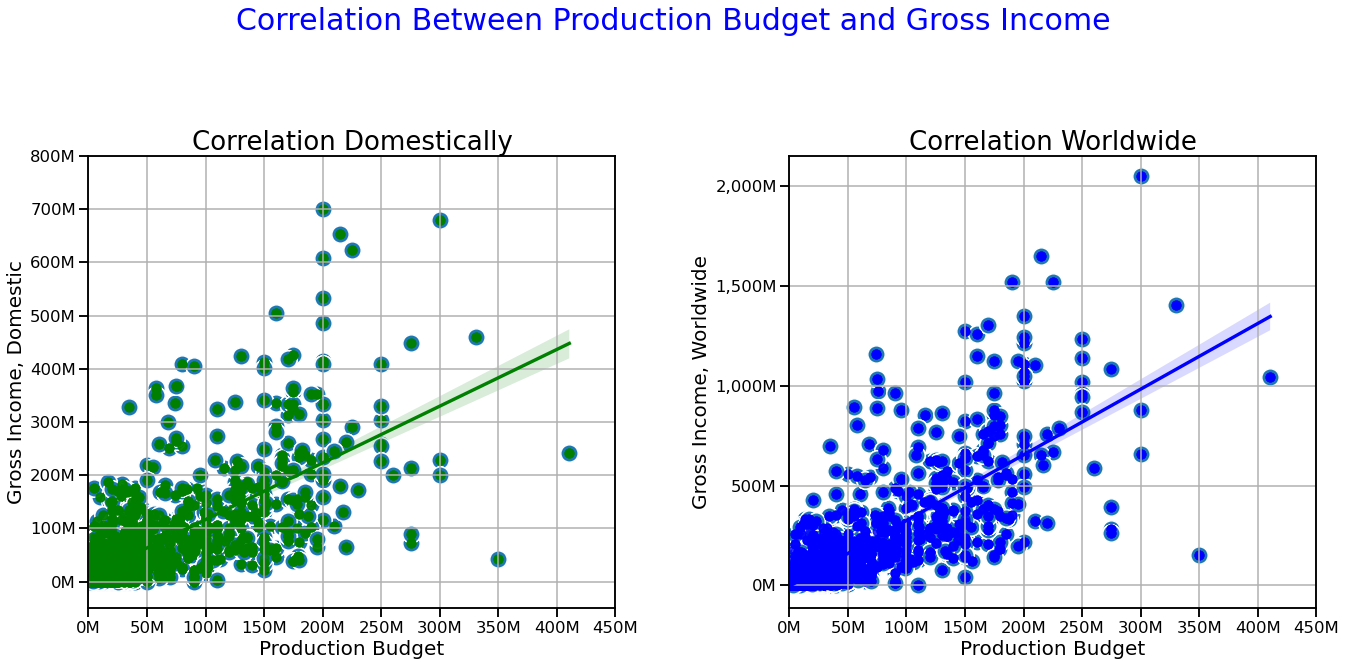

In [688]:
fig, axes = plt.subplots(figsize=(20,10), ncols=2)
sns.scatterplot(data=df_budget_gross_income, x="budget", y="domestic_gross", s=300,
               ax=axes[0])
sns.scatterplot(data=df_budget_gross_income, x="budget", y="worldwide_gross", s=300,
               ax=axes[1])
g1=sns.regplot(data=df_budget_gross_income, x="budget", y="domestic_gross", color="Green", ax=axes[0])
g2=sns.regplot(data=df_budget_gross_income, x="budget", y="worldwide_gross", color="Blue", ax=axes[1])

axes[0].set_title("Correlation Domestically", fontsize=26);
axes[0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[0].set_xlabel('Production Budget', fontsize=20)
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_yticks()/1000000]
axes[0].set_xticklabels(xlabels)
axes[0].set_yticklabels(ylabels)
axes[0].set_ylim(-50000000, 800000000)
axes[0].set_xlim(0, 450000000)
axes[0].grid()

axes[1].set_title("Correlation Worldwide", fontsize=26);
axes[1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[1].set_xlabel('Production Budget', fontsize=20)
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_yticks()/1000000]
axes[1].set_xticklabels(xlabels)
axes[1].set_yticklabels(ylabels)
axes[1].set_xlim(0, 450000000)
#axes[1].set_ylim(-50000000, 2000000000)
axes[1].grid();

plt.suptitle("Correlation Between Production Budget and Gross Income", size=30, c="Blue")
plt.tight_layout(pad=3)

<div class="alert alert-block alert-success">
    The correlation between Gross Income and budget can be seen on the plots above. However, it might be too congested because the movies of different genres are clumped together. It is logical to assume that movies of different genres might have different budget needs. For example, horror movies are cheaper to produce while sci-fi or action movies are quite expensive.
    It would be a good exercise to put side by side the correlations within all three genres that performed the best on their ROI (Horror, Mystery, Thriller), both domestically and abroad.
    </div>

In [802]:
#Generating a Dataframe with financial data for three genres
q="""SELECT production_budget budget, domestic_gross, worldwide_gross, genres
     FROM ROI_tn_imdb_genres where genres in ('Horror', 'Mystery','Thriller')"""
df_budget_gross_income_three_genres=table_query(q)

In [722]:
#Generating three separate DAtaFrames per genre
q="""SELECT production_budget budget, domestic_gross, worldwide_gross, genres
     FROM ROI_tn_imdb_genres where genres='Horror'"""
df_budget_gross_income_horror=table_query(q)

q="""SELECT production_budget budget, domestic_gross, worldwide_gross, genres
     FROM ROI_tn_imdb_genres where genres='Mystery'"""
df_budget_gross_income_mystery=table_query(q)

q="""SELECT production_budget budget, domestic_gross, worldwide_gross, genres
     FROM ROI_tn_imdb_genres where genres='Thriller'"""
df_budget_gross_income_thriller=table_query(q)

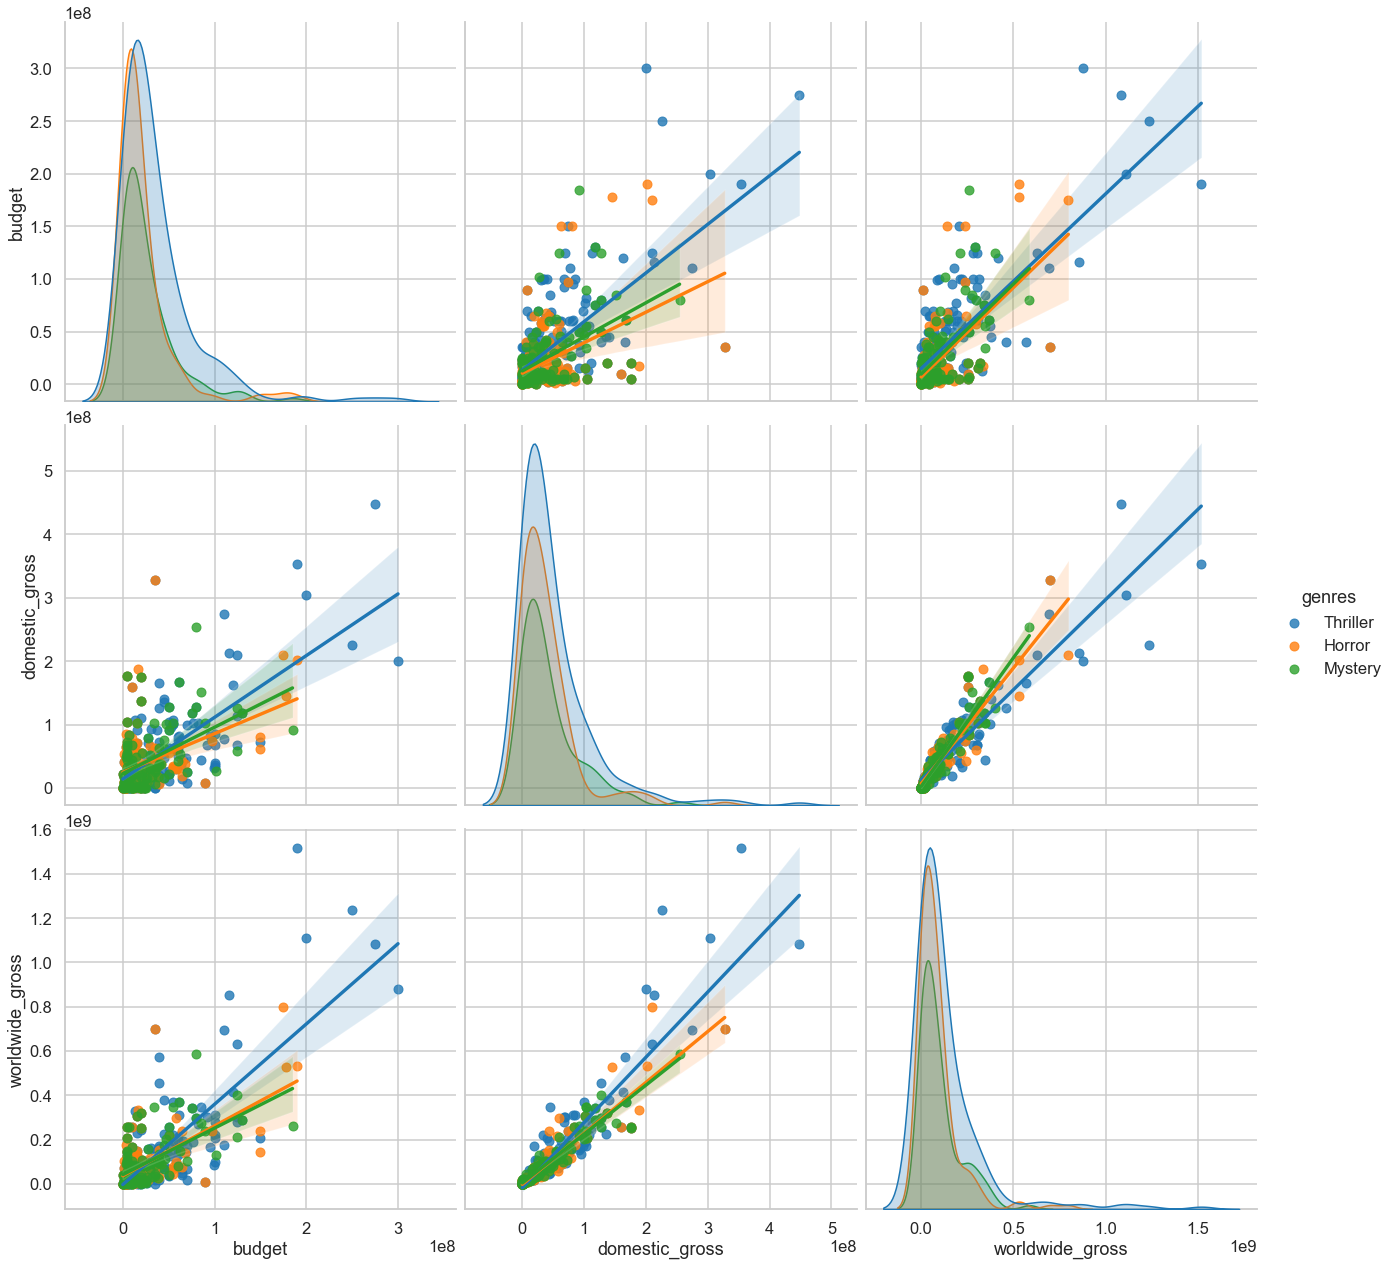

In [804]:
#To visualize the correlation between domestic/worldwide pairplot is being used
sns.pairplot(data=df_budget_gross_income_three_genres, kind='reg', hue='genres', height=6)

<div class="alert alert-block alert-success">Visual investigation of the plots above clearly leads to the conclusion that there are three separate correlations between gross income and production budget for movies in Horror, Mystery and Thriller genres
    </div>

<div class="alert alert-block alert-info">Based on the analysis above it would be logical to visualize the correlation of all three genres to present them to the customer
    </div>

<ipython-input-807-e932ea1b7364>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(xlabels)
<ipython-input-807-e932ea1b7364>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels)
<ipython-input-807-e932ea1b7364>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(xlabels)
<ipython-input-807-e932ea1b7364>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_yticklabels(ylabels)
<ipython-input-807-e932ea1b7364>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(xlabels)
<ipython-input-807-e932ea1b7364>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_yticklabels(ylabels)
<ipython-input-807-e932ea1b7364>:50: UserWarning: FixedFormatter should only be used together with FixedLo

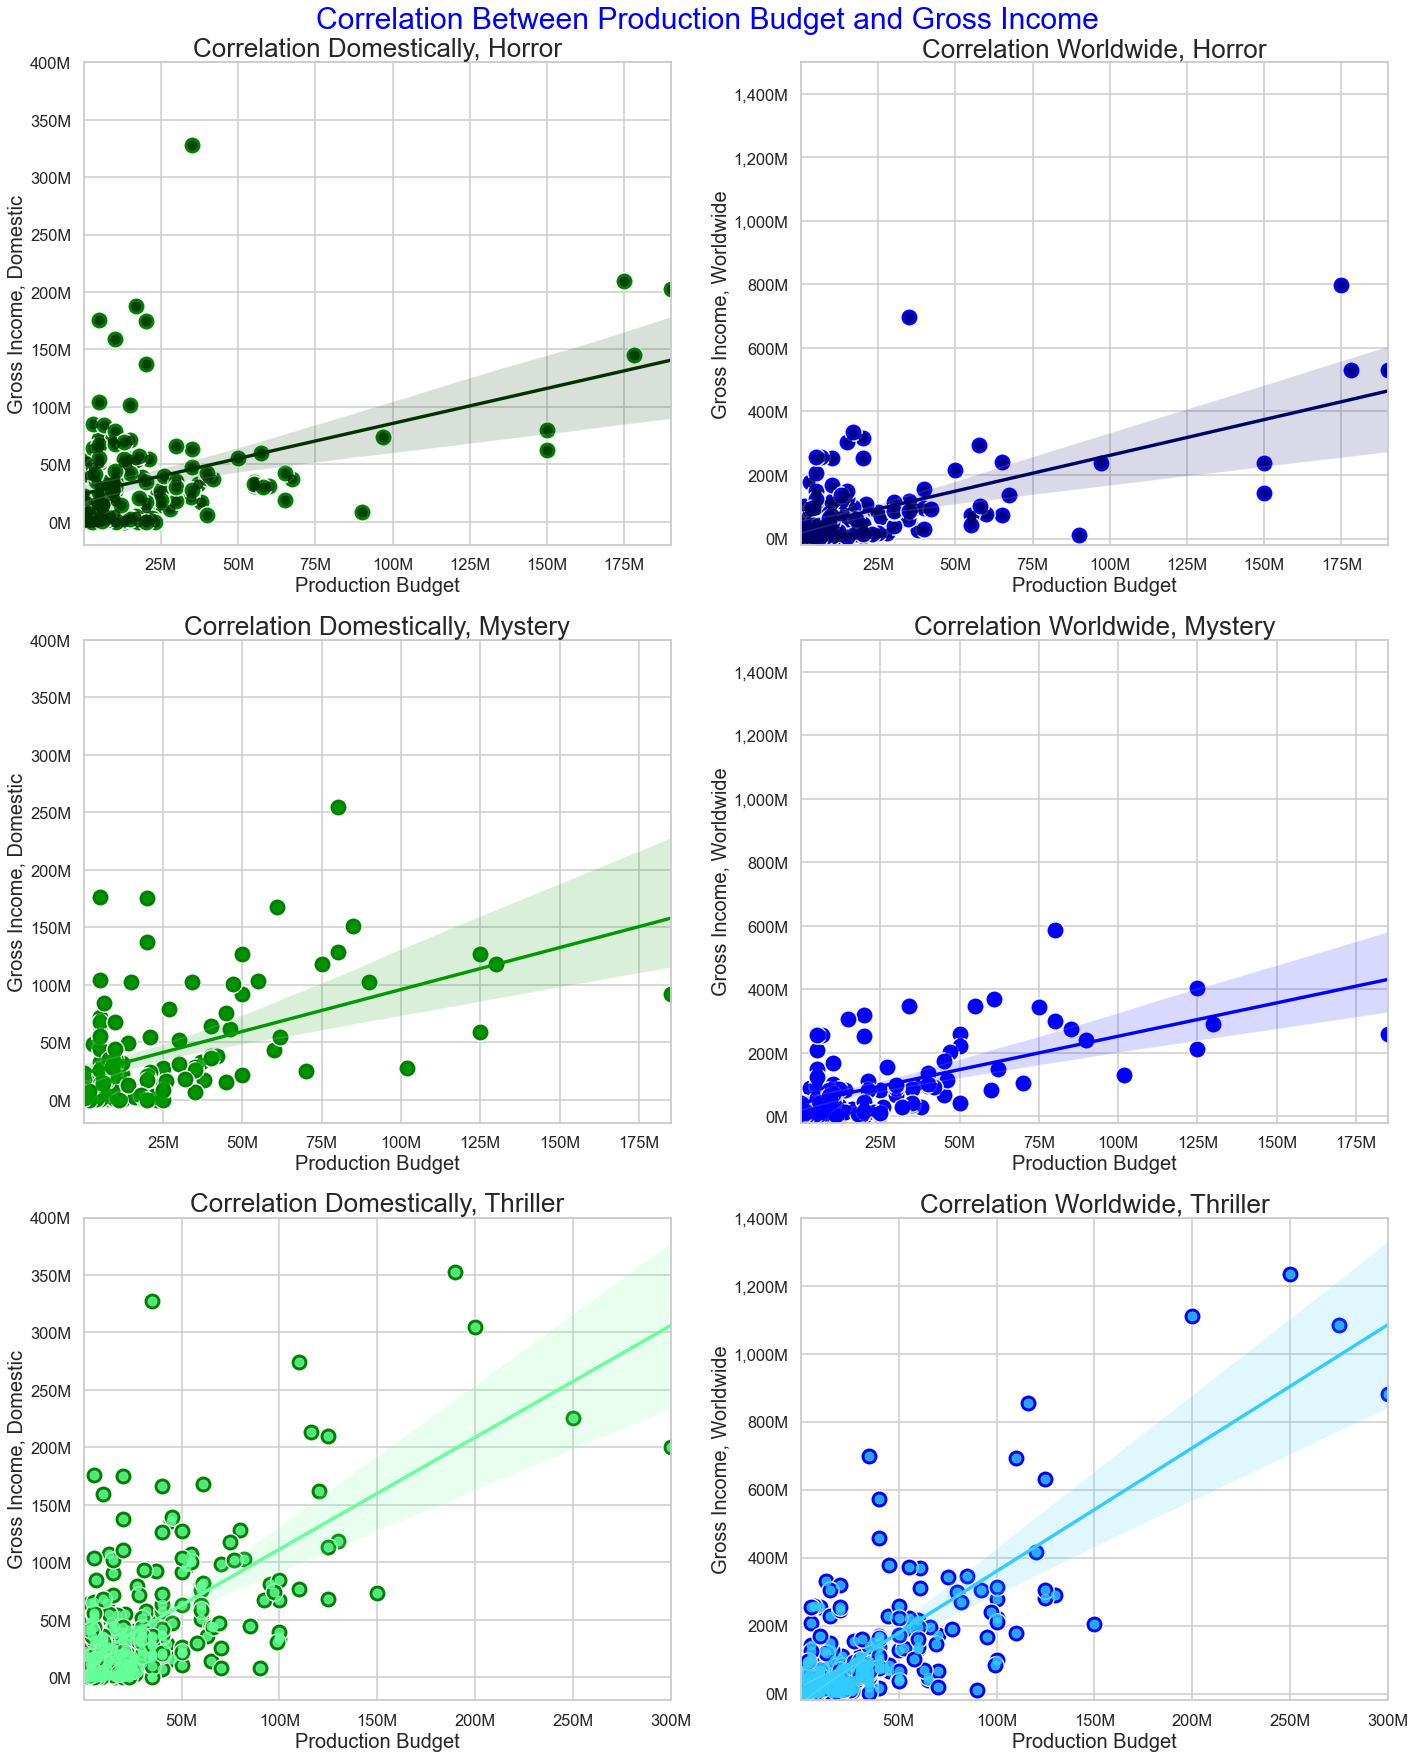

In [807]:
fig, axes = plt.subplots(figsize=(20,25), ncols=2, nrows=3)
#sns.set_style('whitegrid')
sns.scatterplot(data=df_budget_gross_income_horror, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[0,0])
sns.scatterplot(data=df_budget_gross_income_horror, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[0,1])
sns.scatterplot(data=df_budget_gross_income_mystery, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[1,0])
sns.scatterplot(data=df_budget_gross_income_mystery, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[1,1])
sns.scatterplot(data=df_budget_gross_income_thriller, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[2,0])
sns.scatterplot(data=df_budget_gross_income_thriller, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[2,1])

g1=sns.regplot(data=df_budget_gross_income_horror, x="budget", y="domestic_gross", color="#003300", ax=axes[0,0]);
g2=sns.regplot(data=df_budget_gross_income_horror, x="budget", y="worldwide_gross", color="#000066", ax=axes[0,1]);
g3=sns.regplot(data=df_budget_gross_income_mystery, x="budget", y="domestic_gross", color="#009900", ax=axes[1,0]);
g4=sns.regplot(data=df_budget_gross_income_mystery, x="budget", y="worldwide_gross", color="#0000ff", ax=axes[1,1]);
g5=sns.regplot(data=df_budget_gross_income_thriller, x="budget", y="domestic_gross", color="#66ff99", ax=axes[2,0]);
g6=sns.regplot(data=df_budget_gross_income_thriller, x="budget", y="worldwide_gross", color="#33ccff", ax=axes[2,1]);                

axes[0,0].set_title("Correlation Domestically, Horror", fontsize=26);
axes[0,0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[0,0].set_xlabel('Production Budget', fontsize=20)
axes[0,0].set_ylim((-20000000.0), (400000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_yticks()/1000000]
axes[0,0].set_xticklabels(xlabels)
axes[0,0].set_yticklabels(ylabels)

axes[0,1].set_title("Correlation Worldwide, Horror", fontsize=26);
axes[0,1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[0,1].set_xlabel('Production Budget', fontsize=20)
axes[0,1].set_ylim((-20000000.0), (1500000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_yticks()/1000000]
axes[0,1].set_xticklabels(xlabels)
axes[0,1].set_yticklabels(ylabels)

axes[1,0].set_title("Correlation Domestically, Mystery", fontsize=26);
axes[1,0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[1,0].set_xlabel('Production Budget', fontsize=20)
axes[1,0].set_ylim((-20000000.0), (400000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g3.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g3.get_yticks()/1000000]
axes[1,0].set_xticklabels(xlabels)
axes[1,0].set_yticklabels(ylabels)

axes[1,1].set_title("Correlation Worldwide, Mystery", fontsize=26);
axes[1,1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[1,1].set_xlabel('Production Budget', fontsize=20)
axes[1,1].set_ylim((-20000000.0), (1500000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g4.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g4.get_yticks()/1000000]
axes[1,1].set_xticklabels(xlabels)
axes[1,1].set_yticklabels(ylabels)
                
axes[2,0].set_title("Correlation Domestically, Thriller", fontsize=26);
axes[2,0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[2,0].set_xlabel('Production Budget', fontsize=20)
axes[2,0].set_ylim((-20000000.0), (400000000.0))

xlabels = ['{:,.0f}'.format(x) + 'M' for x in g5.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g5.get_yticks()/1000000]
axes[2,0].set_xticklabels(xlabels)
axes[2,0].set_yticklabels(ylabels)

axes[2,1].set_title("Correlation Worldwide, Thriller", fontsize=26);
axes[2,1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[2,1].set_xlabel('Production Budget', fontsize=20)
axes[2,1].set_ylim((-20000000.0), (1400000000.0))

xlabels = ['{:,.0f}'.format(x) + 'M' for x in g6.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g6.get_yticks()/1000000]
axes[2,1].set_xticklabels(xlabels)
axes[2,1].set_yticklabels(ylabels)

plt.suptitle("Correlation Between Production Budget and Gross Income", size=30, c="Blue")
plt.tight_layout()

<div class="alert alert-block alert-info">Visual investigation of the plots above suggests closer inverstigation of the lower quadrant data
    </div>

<ipython-input-816-dec87f25ff2b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(xlabels)
<ipython-input-816-dec87f25ff2b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels)
<ipython-input-816-dec87f25ff2b>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(xlabels)
<ipython-input-816-dec87f25ff2b>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_yticklabels(ylabels)
<ipython-input-816-dec87f25ff2b>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(xlabels)
<ipython-input-816-dec87f25ff2b>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_yticklabels(ylabels)
<ipython-input-816-dec87f25ff2b>:51: UserWarning: FixedFormatter should only be used together with FixedLo

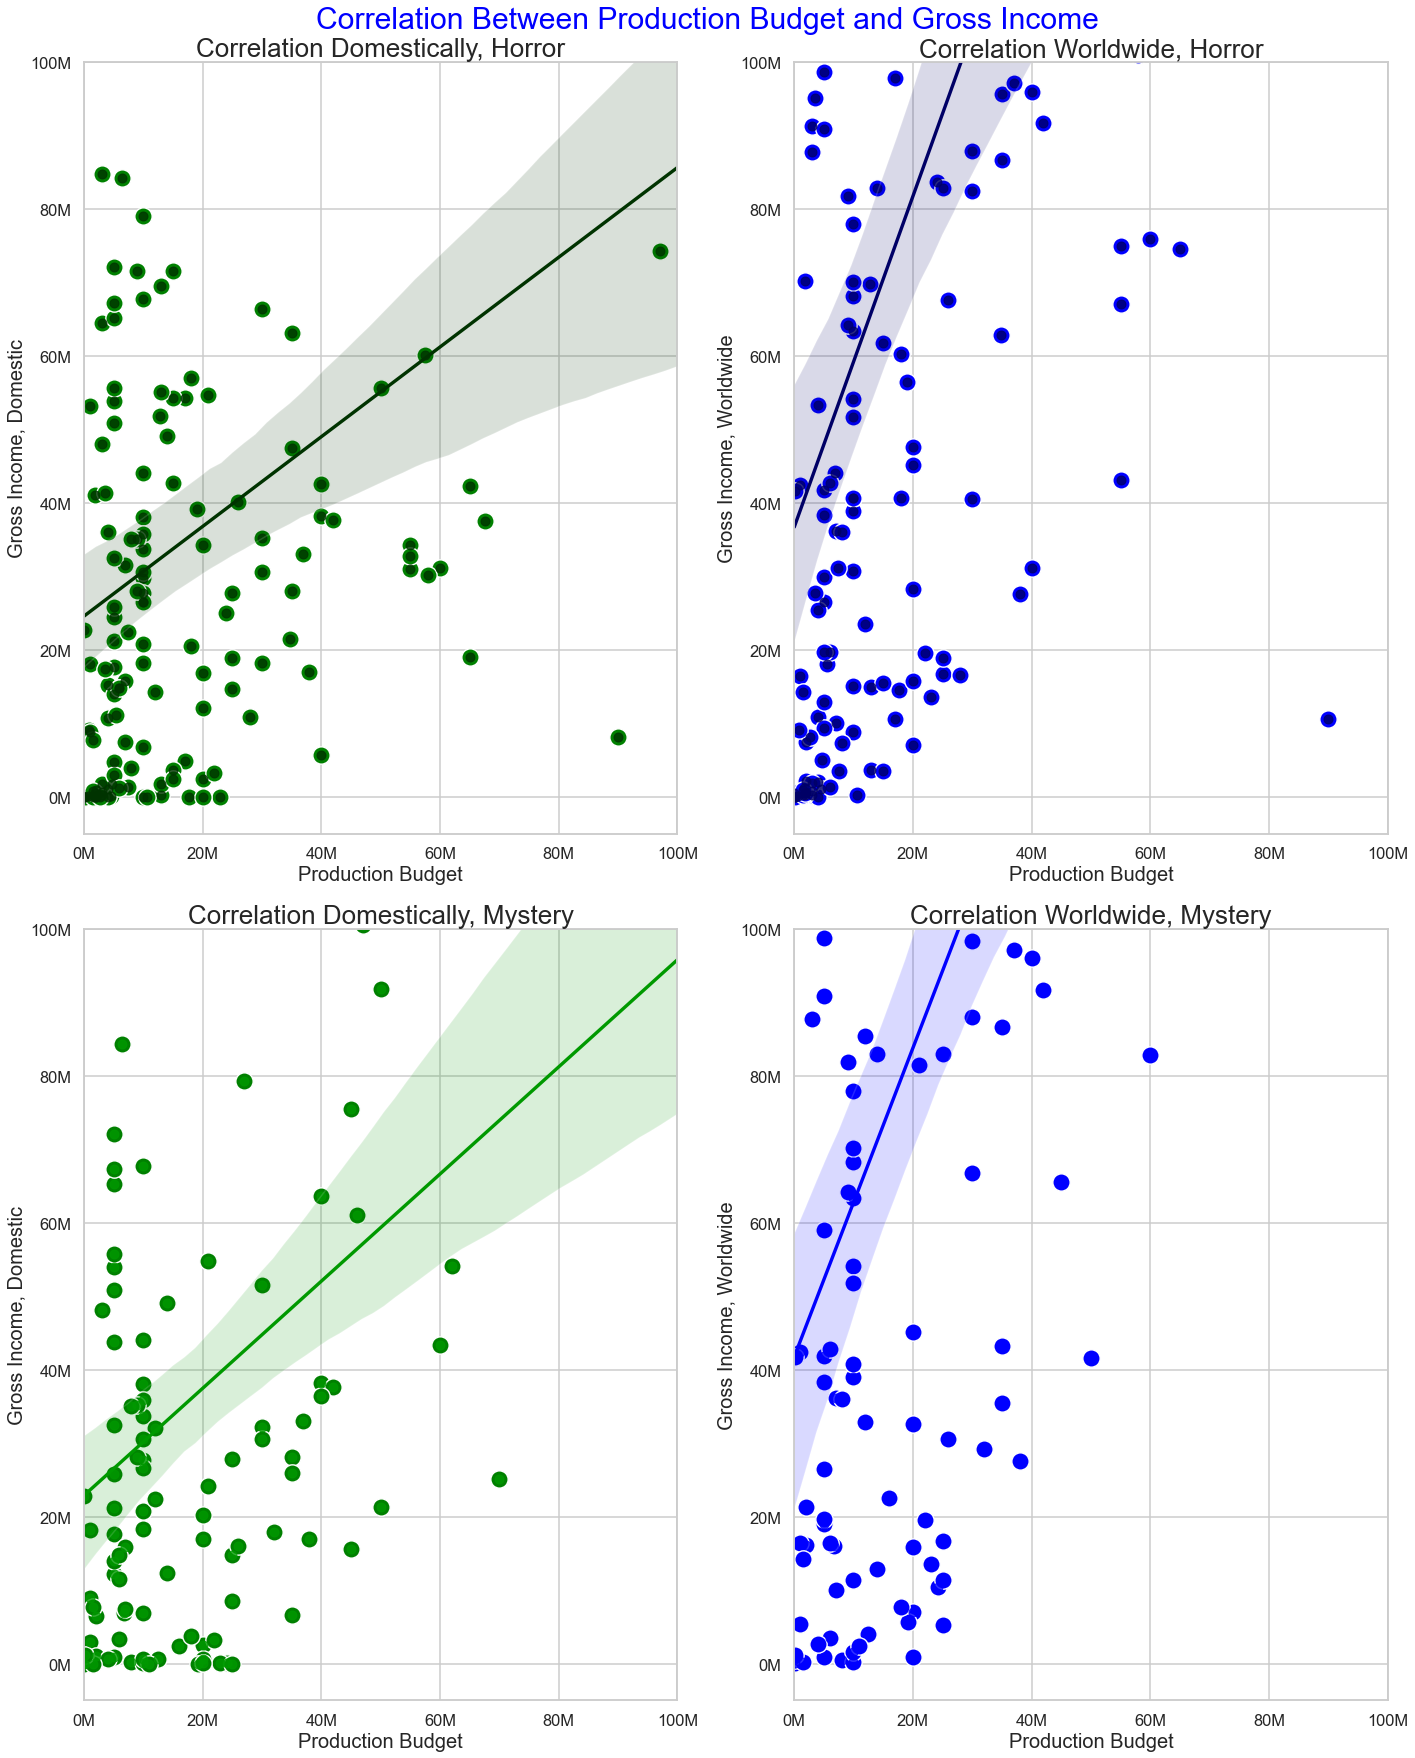

In [816]:
#Ploting Horror and Mystery movies data in the low quadrant plots above, zooming into the previous plots and ploting withing comarable x, y areas
fig, axes = plt.subplots(figsize=(20,25), ncols=2, nrows=2)
#sns.set_style('whitegrid')
sns.scatterplot(data=df_budget_gross_income_horror, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[0,0])
sns.scatterplot(data=df_budget_gross_income_horror, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[0,1])
sns.scatterplot(data=df_budget_gross_income_mystery, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[1,0])
sns.scatterplot(data=df_budget_gross_income_mystery, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[1,1])

g1=sns.regplot(data=df_budget_gross_income_horror, x="budget", y="domestic_gross", color="#003300", ax=axes[0,0]);
g2=sns.regplot(data=df_budget_gross_income_horror, x="budget", y="worldwide_gross", color="#000066", ax=axes[0,1]);
g3=sns.regplot(data=df_budget_gross_income_mystery, x="budget", y="domestic_gross", color="#009900", ax=axes[1,0]);
g4=sns.regplot(data=df_budget_gross_income_mystery, x="budget", y="worldwide_gross", color="#0000ff", ax=axes[1,1]);

axes[0,0].set_title("Correlation Domestically, Horror", fontsize=26);
axes[0,0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[0,0].set_xlabel('Production Budget', fontsize=20)
axes[0,0].set_ylim((-5000000.0), (100000000.0))
axes[0,0].set_xlim((0), (100000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g1.get_yticks()/1000000]
axes[0,0].set_xticklabels(xlabels)
axes[0,0].set_yticklabels(ylabels)

axes[0,1].set_title("Correlation Worldwide, Horror", fontsize=26);
axes[0,1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[0,1].set_xlabel('Production Budget', fontsize=20)
axes[0,1].set_ylim((-5000000.0), (100000000.0))
axes[0,1].set_xlim((0), (100000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g2.get_yticks()/1000000]
axes[0,1].set_xticklabels(xlabels)
axes[0,1].set_yticklabels(ylabels)

axes[1,0].set_title("Correlation Domestically, Mystery", fontsize=26);
axes[1,0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[1,0].set_xlabel('Production Budget', fontsize=20)
axes[1,0].set_ylim((-5000000.0), (100000000.0))
axes[1,0].set_xlim((0), (100000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g3.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g3.get_yticks()/1000000]
axes[1,0].set_xticklabels(xlabels)
axes[1,0].set_yticklabels(ylabels)

axes[1,1].set_title("Correlation Worldwide, Mystery", fontsize=26);
axes[1,1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[1,1].set_xlabel('Production Budget', fontsize=20)
axes[1,1].set_ylim((-5000000.0), (100000000.0))
axes[1,1].set_xlim((0), (100000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g4.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g4.get_yticks()/1000000]
axes[1,1].set_xticklabels(xlabels)
axes[1,1].set_yticklabels(ylabels)
                

plt.suptitle("Correlation Between Production Budget and Gross Income", size=30, c="Blue")
plt.tight_layout()

<div class="alert alert-block alert-success">Visual investigation of the plots above suggests that in Domestic market one can expect close to 2 coefficient in investment with budgets of 20 mi9nutes add lower
    </div>

<ipython-input-818-ed4a5a9b278d>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels)
<ipython-input-818-ed4a5a9b278d>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(ylabels)
<ipython-input-818-ed4a5a9b278d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels)
<ipython-input-818-ed4a5a9b278d>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(ylabels)


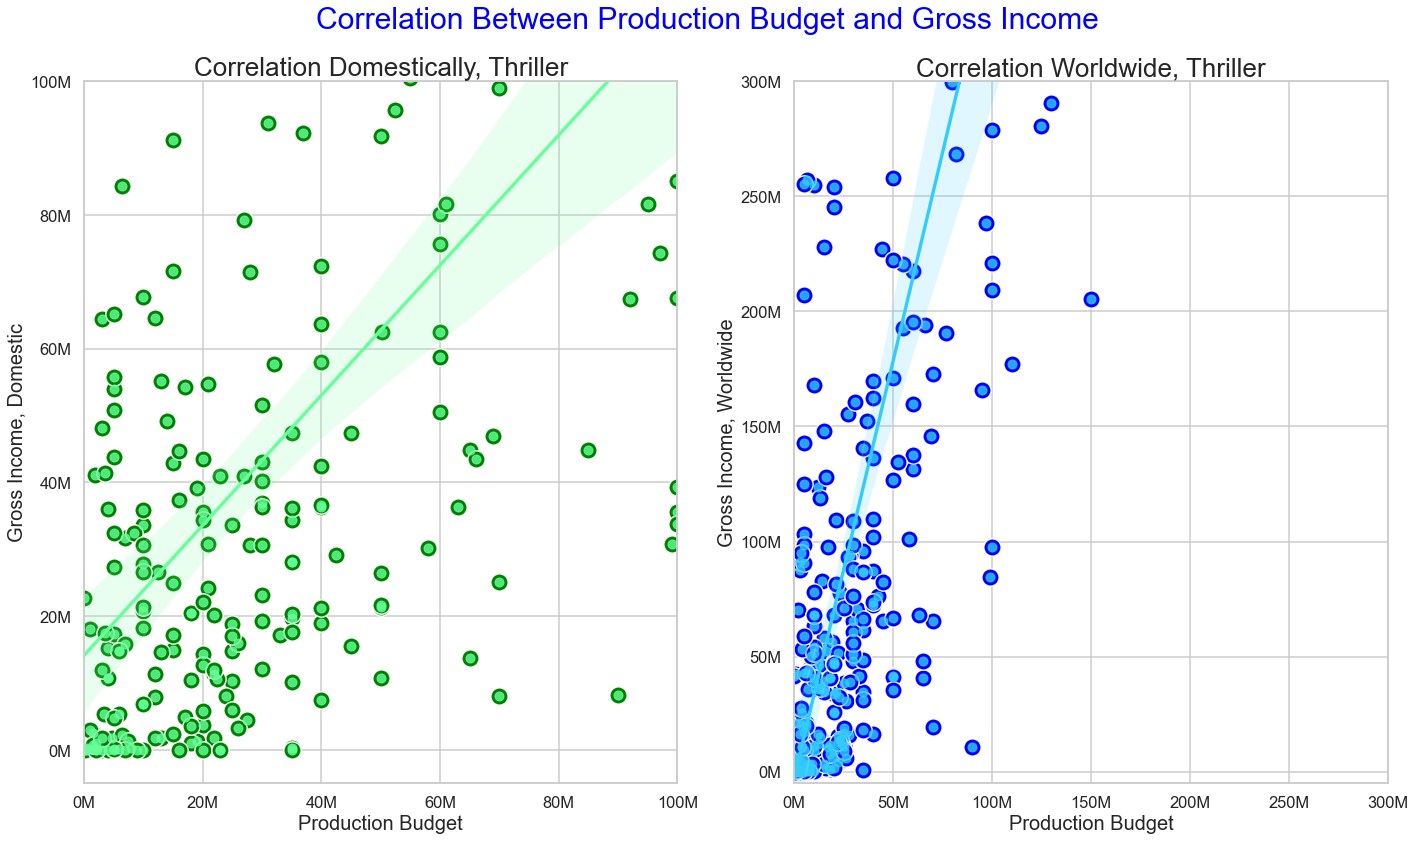

In [818]:
fig, axes = plt.subplots(figsize=(20,12), ncols=2)
#sns.set_style('whitegrid')

sns.scatterplot(data=df_budget_gross_income_thriller, x="budget", y="domestic_gross", s=300, color='Green', ax=axes[0])
sns.scatterplot(data=df_budget_gross_income_thriller, x="budget", y="worldwide_gross", s=300, color= 'Blue', ax=axes[1])


g5=sns.regplot(data=df_budget_gross_income_thriller, x="budget", y="domestic_gross", color="#66ff99", ax=axes[0]);
g6=sns.regplot(data=df_budget_gross_income_thriller, x="budget", y="worldwide_gross", color="#33ccff", ax=axes[1]);                

                
axes[0].set_title("Correlation Domestically, Thriller", fontsize=26);
axes[0].set_ylabel('Gross Income, Domestic', fontsize=20)
axes[0].set_xlabel('Production Budget', fontsize=20)
axes[0].set_ylim((-5000000.0), (100000000.0))
axes[0].set_xlim((0), (100000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g5.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g5.get_yticks()/1000000]
axes[0].set_xticklabels(xlabels)
axes[0].set_yticklabels(ylabels)

axes[1].set_title("Correlation Worldwide, Thriller", fontsize=26);
axes[1].set_ylabel('Gross Income, Worldwide', fontsize=20)
axes[1].set_xlabel('Production Budget', fontsize=20)
axes[1].set_ylim((-5000000.0), (300000000.0))
axes[1].set_xlim((0), (300000000.0))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g6.get_xticks()/1000000]
ylabels = ['{:,.0f}'.format(x) + 'M' for x in g6.get_yticks()/1000000]
axes[1].set_xticklabels(xlabels)
axes[1].set_yticklabels(ylabels)

plt.suptitle("Correlation Between Production Budget and Gross Income", size=30, c="Blue")
plt.tight_layout()

<div class="alert alert-block alert-success">Visual investigation of the plots above suggests that while Thriller movies  do not perform quite as well as horror and mystery movies domestically, meaning the regression model suggests that 20 millions investment would generate about 35 millions in gross income (a coefficient of return is about 1.75), internationally the thriller movies tend to do much better and an estimate of a coefficient of return is about 3.5. The recommendations for the customer is that if they decide to go with a thriller genre release it to the foreign markets as well so maximize the return.
    </div>

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***